# CPI Predicted → 10Y Bond Yields: Model Setup

This notebook sets up the visualization for CPI predicted (St. Louis Fed expected 1-year inflation) vs 10-year Treasury yields.

**No modeling yet** - just plotting the two series together to understand the relationship.


In [137]:
import sys
from pathlib import Path

# Add src to path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.merge_panel import build_fed_panel
from src.utils.logging_utils import setup_logging

# Set up logging
setup_logging()

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print('Imports complete.')


Imports complete.


## Load Data


In [138]:
# Load the Fed panel
panel = build_fed_panel()

print(f"Panel shape: {panel.shape}")
print(f"\nDate range: {panel['date'].min()} to {panel['date'].max()}")
print(f"\nColumns: {list(panel.columns)}")


2026-01-12 16:27:11 - src.data.merge_panel - INFO - Building Fed panel...
2026-01-12 16:27:11 - src.data.merge_panel - INFO - Loading FRED data...
2026-01-12 16:27:11 - src.data.fred_loader - INFO - Merging 14 FRED series into daily panel...
2026-01-12 16:27:11 - src.data.fred_loader - INFO - Computed slope_10y_2y = y_10y - y_2y
2026-01-12 16:27:11 - src.data.fred_loader - INFO - Computed CPI YoY change
2026-01-12 16:27:11 - src.data.fred_loader - INFO - Saved processed FRED panel to /home/bitzaven/CodingProjects/ExamplesFixedIncomeModelling/data/processed/fred_daily_panel.parquet
2026-01-12 16:27:11 - src.data.fred_loader - INFO - Merged panel shape: (28867, 17)
2026-01-12 16:27:11 - src.data.merge_panel - INFO - Loading FedWatch probability data...
2026-01-12 16:27:11 - src.data.fedwatch_loader - WARNING - Processed FedWatch panel not found. Building from raw data...
2026-01-12 16:27:11 - src.data.fedwatch_loader - WARNING - No FedWatch JSON files found
2026-01-12 16:27:11 - src.data

## Extract CPI Predicted and 10Y Yields


In [139]:
# Extract the two series we need
df_plot = panel[['date', 'expinf_1y', 'y_10y']].copy()

# Check data availability
print("Data availability:")
print(f"  CPI Predicted (expinf_1y): {df_plot['expinf_1y'].notna().sum()} / {len(df_plot)} rows ({df_plot['expinf_1y'].notna().sum()/len(df_plot)*100:.1f}%)")
print(f"  10Y Yields (y_10y): {df_plot['y_10y'].notna().sum()} / {len(df_plot)} rows ({df_plot['y_10y'].notna().sum()/len(df_plot)*100:.1f}%)")
print(f"  Both available: {(df_plot['expinf_1y'].notna() & df_plot['y_10y'].notna()).sum()} rows")

# Show date ranges for each series
print("\nDate ranges:")
if df_plot['expinf_1y'].notna().any():
    expinf_dates = df_plot[df_plot['expinf_1y'].notna()]['date']
    print(f"  CPI Predicted: {expinf_dates.min().date()} to {expinf_dates.max().date()}")
if df_plot['y_10y'].notna().any():
    y10_dates = df_plot[df_plot['y_10y'].notna()]['date']
    print(f"  10Y Yields: {y10_dates.min().date()} to {y10_dates.max().date()}")

# Show summary statistics
print("\nSummary statistics:")
print(df_plot[['expinf_1y', 'y_10y']].describe())


Data availability:
  CPI Predicted (expinf_1y): 16083 / 28867 rows (55.7%)
  10Y Yields (y_10y): 23387 / 28867 rows (81.0%)
  Both available: 16083 rows

Date ranges:
  CPI Predicted: 1982-01-01 to 2026-01-12
  10Y Yields: 1962-01-02 to 2026-01-12

Summary statistics:
          expinf_1y         y_10y
count  16083.000000  23387.000000
mean       2.780112      5.821914
std        1.163255      2.940338
min       -0.480678      0.520000
25%        1.924031      3.890000
50%        2.684137      5.460000
75%        3.388122      7.550000
max        6.432108     15.840000


## Plot CPI Predicted vs 10Y Yields


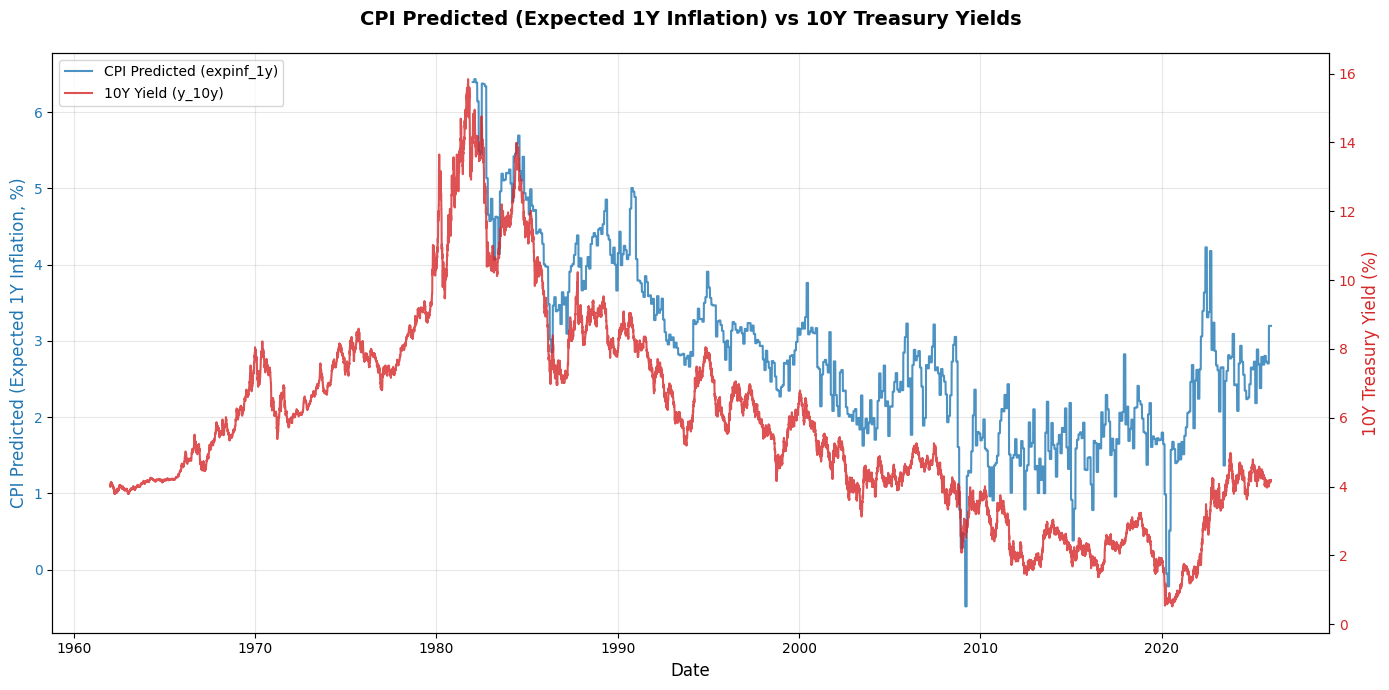

Plot complete. Both series are shown on the same graph with dual y-axes.


In [140]:
# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot CPI Predicted (left y-axis)
color1 = 'tab:blue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('CPI Predicted (Expected 1Y Inflation, %)', color=color1, fontsize=12)
line1 = ax1.plot(df_plot['date'], df_plot['expinf_1y'], color=color1, linewidth=1.5, label='CPI Predicted (expinf_1y)', alpha=0.8)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Create second y-axis for 10Y yields
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('10Y Treasury Yield (%)', color=color2, fontsize=12)
line2 = ax2.plot(df_plot['date'], df_plot['y_10y'], color=color2, linewidth=1.5, label='10Y Yield (y_10y)', alpha=0.8)
ax2.tick_params(axis='y', labelcolor=color2)

# Add title
plt.title('CPI Predicted (Expected 1Y Inflation) vs 10Y Treasury Yields', fontsize=14, fontweight='bold', pad=20)

# Add legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10)

# Adjust layout
fig.tight_layout()
plt.show()

print("Plot complete. Both series are shown on the same graph with dual y-axes.")


## Data Preview

Preview of the data we'll be working with:


In [141]:
# Show recent data where both series are available
df_both = df_plot[(df_plot['expinf_1y'].notna()) & (df_plot['y_10y'].notna())].copy()
print(f"Rows with both CPI Predicted and 10Y yields: {len(df_both)}")
print(f"\nFirst 10 rows:")
print(df_both.head(10))
print(f"\nLast 10 rows:")
print(df_both.tail(10))


Rows with both CPI Predicted and 10Y yields: 16083

First 10 rows:
            date  expinf_1y  y_10y
12784 1982-01-01   6.394507  13.98
12785 1982-01-02   6.394507  13.98
12786 1982-01-03   6.394507  13.98
12787 1982-01-04   6.394507  14.19
12788 1982-01-05   6.394507  14.44
12789 1982-01-06   6.394507  14.59
12790 1982-01-07   6.394507  14.63
12791 1982-01-08   6.394507  14.48
12792 1982-01-09   6.394507  14.48
12793 1982-01-10   6.394507  14.48

Last 10 rows:
            date  expinf_1y  y_10y
28857 2026-01-03   3.197347   4.19
28858 2026-01-04   3.197347   4.19
28859 2026-01-05   3.197347   4.17
28860 2026-01-06   3.197347   4.18
28861 2026-01-07   3.197347   4.15
28862 2026-01-08   3.197347   4.19
28863 2026-01-09   3.197347   4.18
28864 2026-01-10   3.197347   4.18
28865 2026-01-11   3.197347   4.18
28866 2026-01-12   3.197347   4.18


## Predictive Analysis: How Predictive is CPI Predicted of 10Y Yields?


In [142]:
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Work with data where both series are available
df_analysis = df_both.copy().sort_values('date').reset_index(drop=True)

# Remove any remaining NaN values
df_analysis = df_analysis.dropna(subset=['expinf_1y', 'y_10y'])

print("="*80)
print("PREDICTIVE ANALYSIS: CPI Predicted → 10Y Yields")
print("="*80)

# 1. Simple correlation
correlation = df_analysis['expinf_1y'].corr(df_analysis['y_10y'])
print(f"\n1. CORRELATION")
print(f"   Pearson correlation: {correlation:.4f}")

# 2. Lead-lag correlation analysis
print(f"\n2. LEAD-LAG CORRELATION ANALYSIS")
print(f"   Testing if CPI Predicted leads 10Y yields (positive lag = CPI leads)")
max_lag = 20  # days
lags = range(-max_lag, max_lag + 1)
lag_correlations = []

for lag in lags:
    if lag == 0:
        corr = correlation
    elif lag > 0:
        # CPI leads: shift CPI forward, compare with current 10Y
        shifted_cpi = df_analysis['expinf_1y'].shift(-lag)
        corr = shifted_cpi.corr(df_analysis['y_10y'])
    else:
        # 10Y leads: shift 10Y forward, compare with current CPI
        shifted_y10 = df_analysis['y_10y'].shift(lag)
        corr = df_analysis['expinf_1y'].corr(shifted_y10)
    
    lag_correlations.append((lag, corr))

lag_correlations = pd.DataFrame(lag_correlations, columns=['lag', 'correlation'])
best_lag = lag_correlations.loc[lag_correlations['correlation'].abs().idxmax()]
print(f"   Best correlation: {best_lag['correlation']:.4f} at lag {int(best_lag['lag'])} days")
if best_lag['lag'] > 0:
    print(f"   → CPI Predicted LEADS 10Y yields by {int(best_lag['lag'])} days")
elif best_lag['lag'] < 0:
    print(f"   → 10Y yields LEAD CPI Predicted by {abs(int(best_lag['lag']))} days")
else:
    print(f"   → No significant lead/lag (contemporaneous)")

# 3. Regression analysis
print(f"\n3. REGRESSION ANALYSIS")
# Use best lag for regression
if best_lag['lag'] > 0:
    X = df_analysis['expinf_1y'].shift(-int(best_lag['lag'])).dropna()
    y = df_analysis['y_10y'].iloc[:len(X)]
elif best_lag['lag'] < 0:
    X = df_analysis['expinf_1y'].iloc[:len(df_analysis['y_10y'].shift(int(best_lag['lag'])).dropna())]
    y = df_analysis['y_10y'].shift(int(best_lag['lag'])).dropna()
else:
    X = df_analysis['expinf_1y']
    y = df_analysis['y_10y']

# Align indices
common_idx = X.index.intersection(y.index)
X = X.loc[common_idx]
y = y.loc[common_idx]

# Remove NaN
mask = X.notna() & y.notna()
X = X[mask]
y = y[mask]

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
y_pred = slope * X + intercept

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print(f"   R²: {r2:.4f}")
print(f"   RMSE: {rmse:.4f} percentage points")
print(f"   MAE: {mae:.4f} percentage points")
print(f"   Slope: {slope:.4f} (10Y yield change per 1% CPI predicted change)")
print(f"   Intercept: {intercept:.4f}")
print(f"   P-value: {p_value:.2e}")

# 4. Directional accuracy
print(f"\n4. DIRECTIONAL PREDICTIVENESS")
# Calculate daily changes
df_analysis['cpi_change'] = df_analysis['expinf_1y'].diff()
df_analysis['y10_change'] = df_analysis['y_10y'].diff()

# Remove first row (NaN from diff)
df_changes = df_analysis[['date', 'cpi_change', 'y10_change']].dropna()

# Same direction?
same_direction = (df_changes['cpi_change'] > 0) == (df_changes['y10_change'] > 0)
directional_accuracy = same_direction.mean()

print(f"   When CPI Predicted moves up/down, 10Y moves same direction: {directional_accuracy*100:.2f}% of the time")

# 5. Summary
print(f"\n5. SUMMARY")
print(f"   CPI Predicted is {'moderately' if abs(correlation) < 0.5 else 'strongly'} {'positively' if correlation > 0 else 'negatively'} correlated with 10Y yields")
print(f"   Best predictive relationship at lag {int(best_lag['lag'])} days")
print(f"   R² of {r2:.1%} suggests CPI Predicted explains {r2*100:.1f}% of variance in 10Y yields")


PREDICTIVE ANALYSIS: CPI Predicted → 10Y Yields

1. CORRELATION
   Pearson correlation: 0.9236

2. LEAD-LAG CORRELATION ANALYSIS
   Testing if CPI Predicted leads 10Y yields (positive lag = CPI leads)
   Best correlation: 0.9236 at lag 0 days
   → No significant lead/lag (contemporaneous)

3. REGRESSION ANALYSIS
   R²: 0.8530
   RMSE: 1.1416 percentage points
   MAE: 0.8273 percentage points
   Slope: 2.3644 (10Y yield change per 1% CPI predicted change)
   Intercept: -1.2653
   P-value: 0.00e+00

4. DIRECTIONAL PREDICTIVENESS
   When CPI Predicted moves up/down, 10Y moves same direction: 68.93% of the time

5. SUMMARY
   CPI Predicted is strongly positively correlated with 10Y yields
   Best predictive relationship at lag 0 days
   R² of 85.3% suggests CPI Predicted explains 85.3% of variance in 10Y yields


## Lead-Lag Correlation Visualization


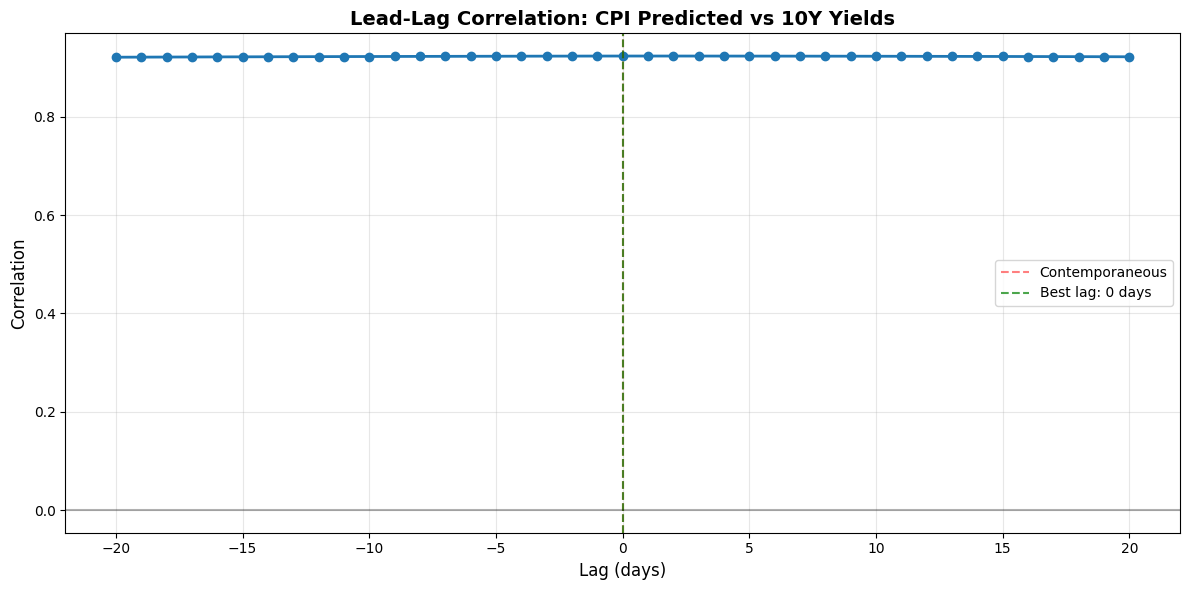

Positive lag = CPI Predicted leads 10Y yields
Negative lag = 10Y yields lead CPI Predicted


In [143]:
# Plot lead-lag correlation
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(lag_correlations['lag'], lag_correlations['correlation'], 'o-', linewidth=2, markersize=6)
ax.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Contemporaneous')
ax.axvline(x=best_lag['lag'], color='green', linestyle='--', alpha=0.7, label=f'Best lag: {int(best_lag["lag"])} days')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax.set_xlabel('Lag (days)', fontsize=12)
ax.set_ylabel('Correlation', fontsize=12)
ax.set_title('Lead-Lag Correlation: CPI Predicted vs 10Y Yields', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

print(f"Positive lag = CPI Predicted leads 10Y yields")
print(f"Negative lag = 10Y yields lead CPI Predicted")


## Spike Detection and Visualization

Detect significant spikes in both series to see if one leads the other.


In [144]:
# Calculate daily changes
df_spikes = df_both.copy().sort_values('date').reset_index(drop=True)
df_spikes['cpi_change'] = df_spikes['expinf_1y'].diff()
df_spikes['y10_change'] = df_spikes['y_10y'].diff()

# Calculate rolling statistics for spike detection
window = 60  # 60-day window for calculating "normal" volatility
df_spikes['cpi_change_std'] = df_spikes['cpi_change'].rolling(window=window, min_periods=20).std()
df_spikes['y10_change_std'] = df_spikes['y10_change'].rolling(window=window, min_periods=20).std()

# Normalize changes by rolling standard deviation (z-scores)
df_spikes['cpi_zscore'] = df_spikes['cpi_change'] / df_spikes['cpi_change_std']
df_spikes['y10_zscore'] = df_spikes['y10_change'] / df_spikes['y10_change_std']

# Define spike threshold (e.g., 2 standard deviations)
spike_threshold = 2.0
df_spikes['cpi_spike'] = df_spikes['cpi_zscore'].abs() > spike_threshold
df_spikes['y10_spike'] = df_spikes['y10_zscore'].abs() > spike_threshold

# Count spikes
n_cpi_spikes = df_spikes['cpi_spike'].sum()
n_y10_spikes = df_spikes['y10_spike'].sum()
n_both_spikes = (df_spikes['cpi_spike'] & df_spikes['y10_spike']).sum()

print(f"SPIKE DETECTION (threshold: {spike_threshold} std dev)")
print(f"="*60)
print(f"CPI Predicted spikes: {n_cpi_spikes}")
print(f"10Y Yield spikes: {n_y10_spikes}")
print(f"Both spike on same day: {n_both_spikes}")
print(f"\nSpike co-occurrence rate: {n_both_spikes / max(n_cpi_spikes, 1) * 100:.1f}% of CPI spikes also have 10Y spikes")
print(f"Spike co-occurrence rate: {n_both_spikes / max(n_y10_spikes, 1) * 100:.1f}% of 10Y spikes also have CPI spikes")


SPIKE DETECTION (threshold: 2.0 std dev)
CPI Predicted spikes: 424
10Y Yield spikes: 1066
Both spike on same day: 44

Spike co-occurrence rate: 10.4% of CPI spikes also have 10Y spikes
Spike co-occurrence rate: 4.1% of 10Y spikes also have CPI spikes


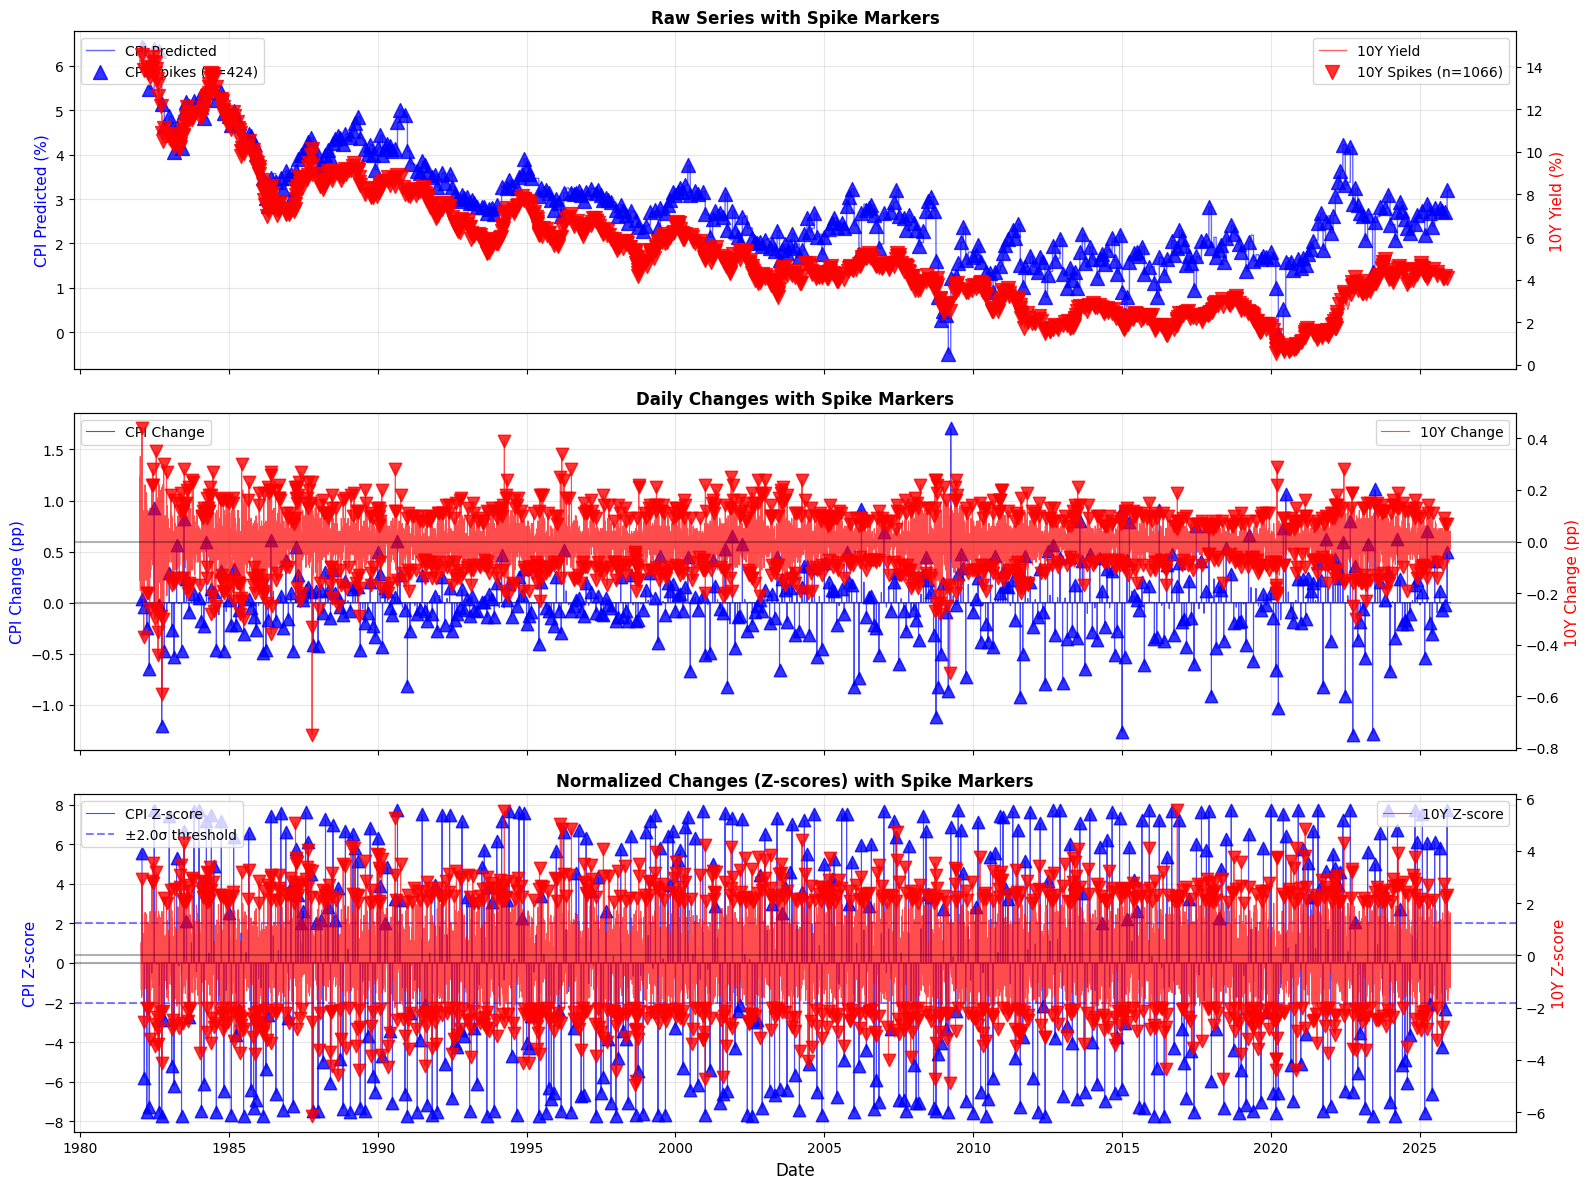


Spike threshold: 2.0 standard deviations
Blue triangles (^) = CPI Predicted spikes
Red triangles (v) = 10Y Yield spikes


In [145]:
# Create spike visualization
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

# Plot 1: Raw series with spike markers
ax1 = axes[0]
ax1_twin = ax1.twinx()

# Plot lines
line1 = ax1.plot(df_spikes['date'], df_spikes['expinf_1y'], color='blue', linewidth=1, alpha=0.6, label='CPI Predicted')
line2 = ax1_twin.plot(df_spikes['date'], df_spikes['y_10y'], color='red', linewidth=1, alpha=0.6, label='10Y Yield')

# Mark spikes
cpi_spike_dates = df_spikes[df_spikes['cpi_spike']]['date']
cpi_spike_values = df_spikes[df_spikes['cpi_spike']]['expinf_1y']
ax1.scatter(cpi_spike_dates, cpi_spike_values, color='blue', s=100, marker='^', 
            alpha=0.8, label=f'CPI Spikes (n={n_cpi_spikes})', zorder=5)

y10_spike_dates = df_spikes[df_spikes['y10_spike']]['date']
y10_spike_values = df_spikes[df_spikes['y10_spike']]['y_10y']
ax1_twin.scatter(y10_spike_dates, y10_spike_values, color='red', s=100, marker='v', 
                 alpha=0.8, label=f'10Y Spikes (n={n_y10_spikes})', zorder=5)

ax1.set_ylabel('CPI Predicted (%)', color='blue', fontsize=11)
ax1_twin.set_ylabel('10Y Yield (%)', color='red', fontsize=11)
ax1.set_title('Raw Series with Spike Markers', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Plot 2: Daily changes (absolute)
ax2 = axes[1]
ax2_twin = ax2.twinx()

ax2.plot(df_spikes['date'], df_spikes['cpi_change'], color='blue', linewidth=0.8, alpha=0.7, label='CPI Change')
ax2_twin.plot(df_spikes['date'], df_spikes['y10_change'], color='red', linewidth=0.8, alpha=0.7, label='10Y Change')

# Mark spikes
ax2.scatter(cpi_spike_dates, df_spikes[df_spikes['cpi_spike']]['cpi_change'], 
            color='blue', s=80, marker='^', alpha=0.8, zorder=5)
ax2_twin.scatter(y10_spike_dates, df_spikes[df_spikes['y10_spike']]['y10_change'], 
                 color='red', s=80, marker='v', alpha=0.8, zorder=5)

ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2_twin.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.set_ylabel('CPI Change (pp)', color='blue', fontsize=11)
ax2_twin.set_ylabel('10Y Change (pp)', color='red', fontsize=11)
ax2.set_title('Daily Changes with Spike Markers', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Plot 3: Z-scores (normalized changes)
ax3 = axes[2]
ax3_twin = ax3.twinx()

ax3.plot(df_spikes['date'], df_spikes['cpi_zscore'], color='blue', linewidth=0.8, alpha=0.7, label='CPI Z-score')
ax3_twin.plot(df_spikes['date'], df_spikes['y10_zscore'], color='red', linewidth=0.8, alpha=0.7, label='10Y Z-score')

# Mark spikes and threshold lines
ax3.scatter(cpi_spike_dates, df_spikes[df_spikes['cpi_spike']]['cpi_zscore'], 
            color='blue', s=80, marker='^', alpha=0.8, zorder=5)
ax3_twin.scatter(y10_spike_dates, df_spikes[df_spikes['y10_spike']]['y10_zscore'], 
                 color='red', s=80, marker='v', alpha=0.8, zorder=5)

ax3.axhline(y=spike_threshold, color='blue', linestyle='--', alpha=0.5, label=f'±{spike_threshold}σ threshold')
ax3.axhline(y=-spike_threshold, color='blue', linestyle='--', alpha=0.5)
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3_twin.axhline(y=0, color='black', linestyle='-', alpha=0.3)

ax3.set_ylabel('CPI Z-score', color='blue', fontsize=11)
ax3_twin.set_ylabel('10Y Z-score', color='red', fontsize=11)
ax3.set_xlabel('Date', fontsize=12)
ax3.set_title('Normalized Changes (Z-scores) with Spike Markers', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

print(f"\nSpike threshold: {spike_threshold} standard deviations")
print(f"Blue triangles (^) = CPI Predicted spikes")
print(f"Red triangles (v) = 10Y Yield spikes")


SPIKE LEAD-LAG ANALYSIS

When CPI spikes, nearest 10Y spike:
  Average lag: 0.29 days
  Positive = 10Y spike comes AFTER CPI spike (CPI leads)
  Negative = 10Y spike comes BEFORE CPI spike (10Y leads)
  Distribution: {-10: 3, -9: 7, -8: 6, -7: 11, -6: 10, -5: 11, -4: 12, -3: 17, -2: 24, -1: 22, 0: 44, 1: 31, 2: 29, 3: 21, 4: 19, 5: 19, 6: 11, 7: 8, 8: 6, 9: 8, 10: 3}

When 10Y spikes, nearest CPI spike:
  Average lag: -0.93 days
  Positive = CPI spike comes AFTER 10Y spike (10Y leads)
  Negative = CPI spike comes BEFORE 10Y spike (CPI leads)
  Distribution: {-10: 22, -9: 38, -8: 23, -7: 28, -6: 36, -5: 41, -4: 39, -3: 32, -2: 40, -1: 39, 0: 44, 1: 26, 2: 29, 3: 26, 4: 23, 5: 22, 6: 18, 7: 20, 8: 23, 9: 19, 10: 20}


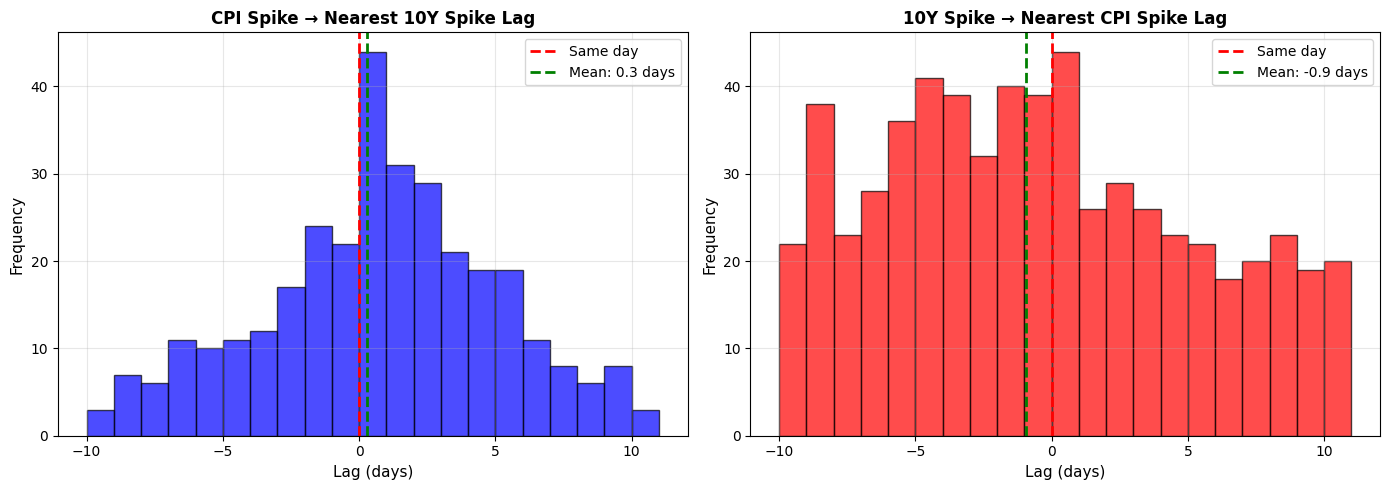

In [146]:
# Analyze spike lead-lag relationships
max_lag_days = 10  # Look for spikes within ±10 days

cpi_spike_indices = df_spikes[df_spikes['cpi_spike']].index
y10_spike_indices = df_spikes[df_spikes['y10_spike']].index

# For each CPI spike, find nearest 10Y spike
cpi_to_y10_lags = []
for cpi_idx in cpi_spike_indices:
    # Find nearest y10 spike within max_lag_days
    nearby_y10 = y10_spike_indices[(y10_spike_indices >= cpi_idx - max_lag_days) & 
                                    (y10_spike_indices <= cpi_idx + max_lag_days)]
    if len(nearby_y10) > 0:
        nearest_y10 = nearby_y10[np.argmin(np.abs(nearby_y10 - cpi_idx))]
        lag = nearest_y10 - cpi_idx
        cpi_to_y10_lags.append(lag)

# For each 10Y spike, find nearest CPI spike
y10_to_cpi_lags = []
for y10_idx in y10_spike_indices:
    nearby_cpi = cpi_spike_indices[(cpi_spike_indices >= y10_idx - max_lag_days) & 
                                    (cpi_spike_indices <= y10_idx + max_lag_days)]
    if len(nearby_cpi) > 0:
        nearest_cpi = nearby_cpi[np.argmin(np.abs(nearby_cpi - y10_idx))]
        lag = nearest_cpi - y10_idx
        y10_to_cpi_lags.append(lag)

print("SPIKE LEAD-LAG ANALYSIS")
print("="*60)
if len(cpi_to_y10_lags) > 0:
    avg_lag_cpi_to_y10 = np.mean(cpi_to_y10_lags)
    print(f"\nWhen CPI spikes, nearest 10Y spike:")
    print(f"  Average lag: {avg_lag_cpi_to_y10:.2f} days")
    print(f"  Positive = 10Y spike comes AFTER CPI spike (CPI leads)")
    print(f"  Negative = 10Y spike comes BEFORE CPI spike (10Y leads)")
    print(f"  Distribution: {pd.Series(cpi_to_y10_lags).value_counts().sort_index().to_dict()}")

if len(y10_to_cpi_lags) > 0:
    avg_lag_y10_to_cpi = np.mean(y10_to_cpi_lags)
    print(f"\nWhen 10Y spikes, nearest CPI spike:")
    print(f"  Average lag: {avg_lag_y10_to_cpi:.2f} days")
    print(f"  Positive = CPI spike comes AFTER 10Y spike (10Y leads)")
    print(f"  Negative = CPI spike comes BEFORE 10Y spike (CPI leads)")
    print(f"  Distribution: {pd.Series(y10_to_cpi_lags).value_counts().sort_index().to_dict()}")

# Visualize lag distribution
if len(cpi_to_y10_lags) > 0 or len(y10_to_cpi_lags) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    if len(cpi_to_y10_lags) > 0:
        ax1 = axes[0]
        ax1.hist(cpi_to_y10_lags, bins=range(-max_lag_days, max_lag_days+2), 
                alpha=0.7, color='blue', edgecolor='black')
        ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Same day')
        ax1.axvline(x=avg_lag_cpi_to_y10, color='green', linestyle='--', linewidth=2, 
                   label=f'Mean: {avg_lag_cpi_to_y10:.1f} days')
        ax1.set_xlabel('Lag (days)', fontsize=11)
        ax1.set_ylabel('Frequency', fontsize=11)
        ax1.set_title('CPI Spike → Nearest 10Y Spike Lag', fontsize=12, fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
    
    if len(y10_to_cpi_lags) > 0:
        ax2 = axes[1]
        ax2.hist(y10_to_cpi_lags, bins=range(-max_lag_days, max_lag_days+2), 
                alpha=0.7, color='red', edgecolor='black')
        ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Same day')
        ax2.axvline(x=avg_lag_y10_to_cpi, color='green', linestyle='--', linewidth=2, 
                   label=f'Mean: {avg_lag_y10_to_cpi:.1f} days')
        ax2.set_xlabel('Lag (days)', fontsize=11)
        ax2.set_ylabel('Frequency', fontsize=11)
        ax2.set_title('10Y Spike → Nearest CPI Spike Lag', fontsize=12, fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## Delta Graph: Short-Term Changes Normalized by STD

Show short-term deltas (changes) of both series, normalized by their respective standard deviations.


In [147]:
# Calculate short-term deltas (changes) and normalize by STD
df_delta = df_both.copy().sort_values('date').reset_index(drop=True)

# Calculate deltas (daily changes)
df_delta['cpi_delta'] = df_delta['expinf_1y'].diff()
df_delta['y10_delta'] = df_delta['y_10y'].diff()

# Calculate overall standard deviations for normalization
cpi_delta_std = df_delta['cpi_delta'].std()
y10_delta_std = df_delta['y10_delta'].std()

# Normalize by overall STD
df_delta['cpi_delta_normalized'] = df_delta['cpi_delta'] / cpi_delta_std
df_delta['y10_delta_normalized'] = df_delta['y10_delta'] / y10_delta_std

# Also calculate rolling STD normalization (alternative view)
rolling_window = 60
df_delta['cpi_delta_rolling_std'] = df_delta['cpi_delta'].rolling(window=rolling_window, min_periods=20).std()
df_delta['y10_delta_rolling_std'] = df_delta['y10_delta'].rolling(window=rolling_window, min_periods=20).std()
df_delta['cpi_delta_rolling_normalized'] = df_delta['cpi_delta'] / df_delta['cpi_delta_rolling_std']
df_delta['y10_delta_rolling_normalized'] = df_delta['y10_delta'] / df_delta['y10_delta_rolling_std']

print("DELTA STATISTICS")
print("="*60)
print(f"CPI Delta STD: {cpi_delta_std:.4f} percentage points")
print(f"10Y Delta STD: {y10_delta_std:.4f} percentage points")
print(f"\nNormalized deltas show changes in units of standard deviation")


DELTA STATISTICS
CPI Delta STD: 0.0639 percentage points
10Y Delta STD: 0.0537 percentage points

Normalized deltas show changes in units of standard deviation


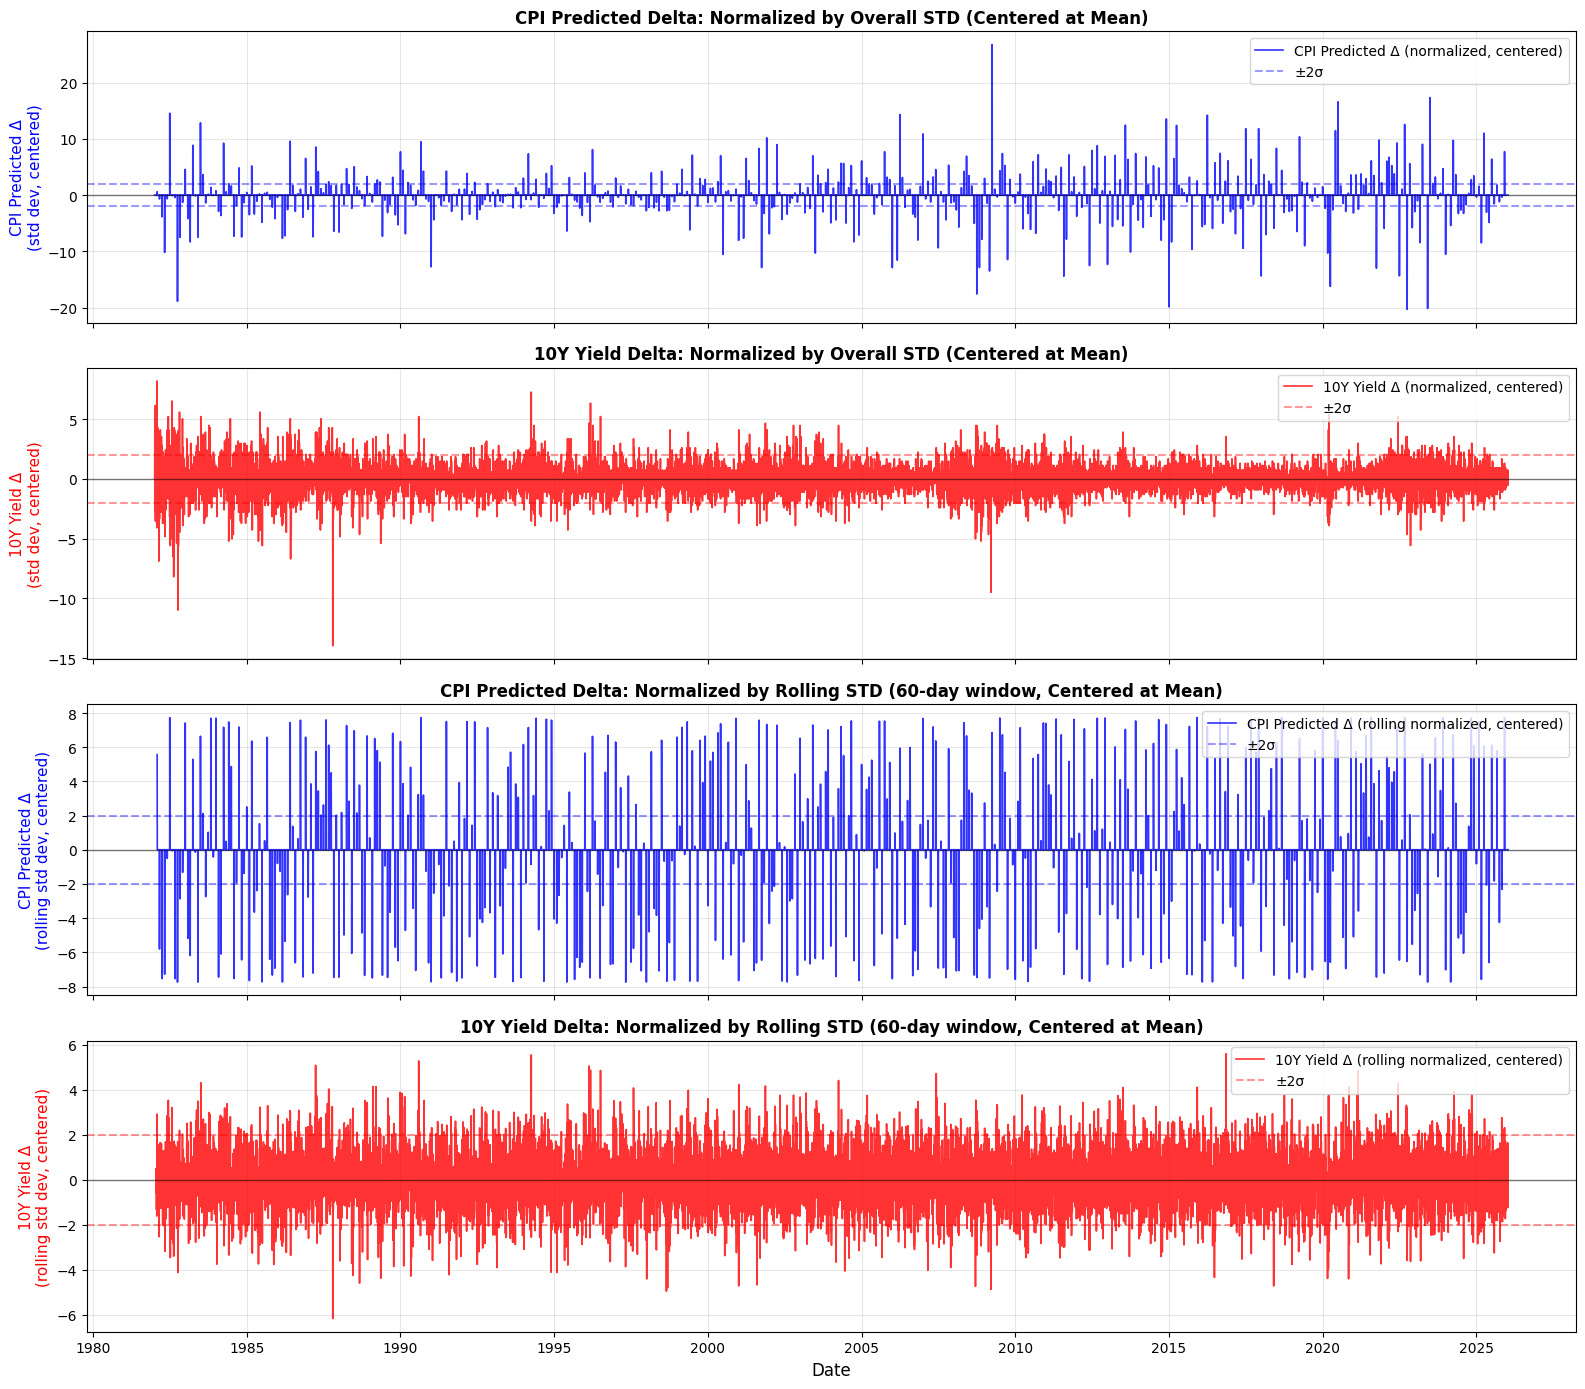


Delta graphs split into separate plots, both centered at mean (0)
Top two: Normalized by overall historical STD
Bottom two: Normalized by rolling STD (adapts to changing volatility)

Values show how many standard deviations each daily change represents


In [148]:
# Create split delta graphs with aligned means
# Normalize by centering at mean (subtract mean, divide by std)
cpi_mean = df_delta['cpi_delta_normalized'].mean()
y10_mean = df_delta['y10_delta_normalized'].mean()

df_delta['cpi_delta_centered'] = df_delta['cpi_delta_normalized'] - cpi_mean
df_delta['y10_delta_centered'] = df_delta['y10_delta_normalized'] - y10_mean

# Rolling normalized - also center
cpi_rolling_mean = df_delta['cpi_delta_rolling_normalized'].mean()
y10_rolling_mean = df_delta['y10_delta_rolling_normalized'].mean()

df_delta['cpi_delta_rolling_centered'] = df_delta['cpi_delta_rolling_normalized'] - cpi_rolling_mean
df_delta['y10_delta_rolling_centered'] = df_delta['y10_delta_rolling_normalized'] - y10_rolling_mean

# Create split delta graphs
fig, axes = plt.subplots(4, 1, figsize=(16, 14), sharex=True)

# Plot 1: CPI Delta - Overall STD
ax1 = axes[0]
ax1.plot(df_delta['date'], df_delta['cpi_delta_centered'], 
         color='blue', linewidth=1.2, alpha=0.8, label='CPI Predicted Δ (normalized, centered)')
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax1.axhline(y=2, color='blue', linestyle='--', alpha=0.4, label='±2σ')
ax1.axhline(y=-2, color='blue', linestyle='--', alpha=0.4)
ax1.set_ylabel('CPI Predicted Δ\n(std dev, centered)', color='blue', fontsize=11)
ax1.set_title('CPI Predicted Delta: Normalized by Overall STD (Centered at Mean)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')

# Plot 2: 10Y Delta - Overall STD
ax2 = axes[1]
ax2.plot(df_delta['date'], df_delta['y10_delta_centered'], 
         color='red', linewidth=1.2, alpha=0.8, label='10Y Yield Δ (normalized, centered)')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax2.axhline(y=2, color='red', linestyle='--', alpha=0.4, label='±2σ')
ax2.axhline(y=-2, color='red', linestyle='--', alpha=0.4)
ax2.set_ylabel('10Y Yield Δ\n(std dev, centered)', color='red', fontsize=11)
ax2.set_title('10Y Yield Delta: Normalized by Overall STD (Centered at Mean)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

# Plot 3: CPI Delta - Rolling STD
ax3 = axes[2]
ax3.plot(df_delta['date'], df_delta['cpi_delta_rolling_centered'], 
         color='blue', linewidth=1.2, alpha=0.8, label='CPI Predicted Δ (rolling normalized, centered)')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax3.axhline(y=2, color='blue', linestyle='--', alpha=0.4, label='±2σ')
ax3.axhline(y=-2, color='blue', linestyle='--', alpha=0.4)
ax3.set_ylabel('CPI Predicted Δ\n(rolling std dev, centered)', color='blue', fontsize=11)
ax3.set_title(f'CPI Predicted Delta: Normalized by Rolling STD ({rolling_window}-day window, Centered at Mean)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper right')

# Plot 4: 10Y Delta - Rolling STD
ax4 = axes[3]
ax4.plot(df_delta['date'], df_delta['y10_delta_rolling_centered'], 
         color='red', linewidth=1.2, alpha=0.8, label='10Y Yield Δ (rolling normalized, centered)')
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax4.axhline(y=2, color='red', linestyle='--', alpha=0.4, label='±2σ')
ax4.axhline(y=-2, color='red', linestyle='--', alpha=0.4)
ax4.set_ylabel('10Y Yield Δ\n(rolling std dev, centered)', color='red', fontsize=11)
ax4.set_xlabel('Date', fontsize=12)
ax4.set_title(f'10Y Yield Delta: Normalized by Rolling STD ({rolling_window}-day window, Centered at Mean)', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()

print("\nDelta graphs split into separate plots, both centered at mean (0)")
print("Top two: Normalized by overall historical STD")
print("Bottom two: Normalized by rolling STD (adapts to changing volatility)")
print("\nValues show how many standard deviations each daily change represents")


## Scatter Plot: Delta Relationship

Visualize the relationship between CPI deltas and 10Y deltas.


## Short-Term Snapshots

Show recent periods to see detailed behavior.


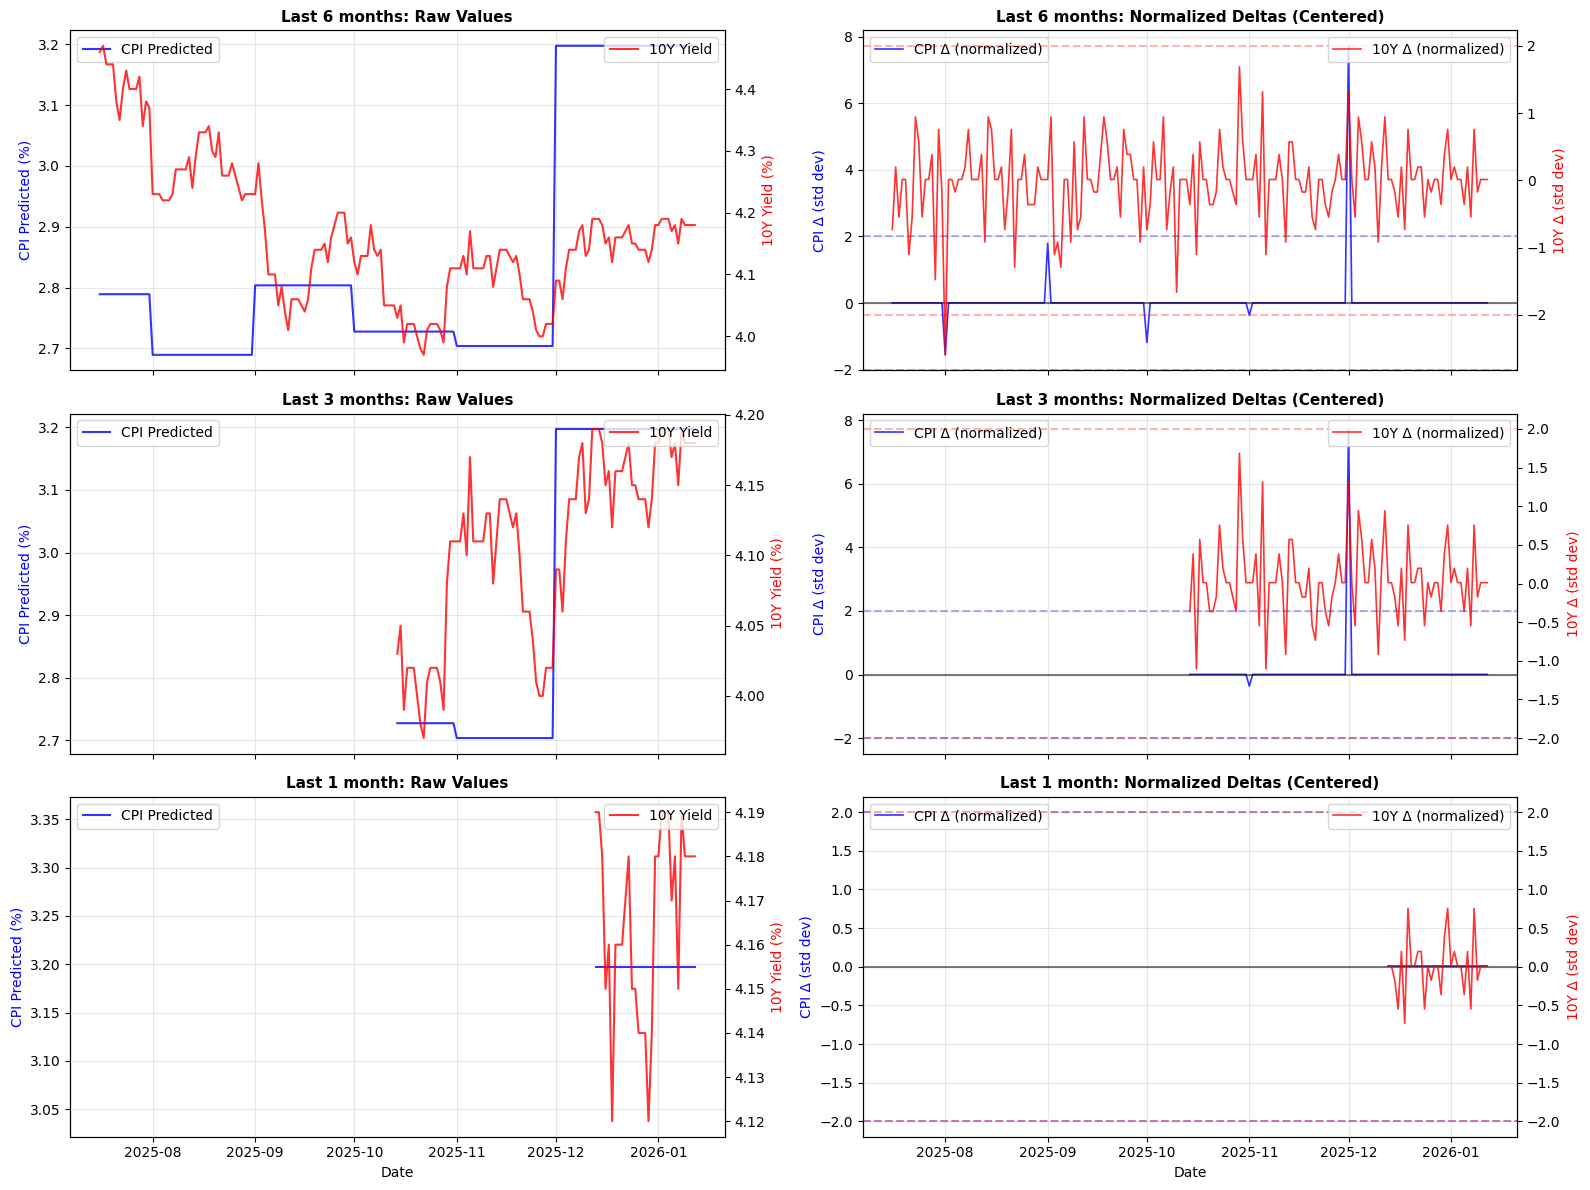

Snapshots showing recent periods for detailed view


In [149]:
# Create short-term snapshots for recent periods
snapshot_periods = [
    ('Last 6 months', 180),
    ('Last 3 months', 90),
    ('Last 1 month', 30),
]

fig, axes = plt.subplots(len(snapshot_periods), 2, figsize=(16, 4*len(snapshot_periods)), sharex='col')

for idx, (period_name, days) in enumerate(snapshot_periods):
    # Filter to recent period
    recent_date = df_delta['date'].max() - pd.Timedelta(days=days)
    df_snapshot = df_delta[df_delta['date'] >= recent_date].copy()
    
    # Plot 1: Raw values
    ax1 = axes[idx, 0]
    ax1_twin = ax1.twinx()
    
    line1 = ax1.plot(df_snapshot['date'], df_snapshot['expinf_1y'], 
                     color='blue', linewidth=1.5, alpha=0.8, label='CPI Predicted')
    line2 = ax1_twin.plot(df_snapshot['date'], df_snapshot['y_10y'], 
                          color='red', linewidth=1.5, alpha=0.8, label='10Y Yield')
    
    ax1.set_ylabel('CPI Predicted (%)', color='blue', fontsize=10)
    ax1_twin.set_ylabel('10Y Yield (%)', color='red', fontsize=10)
    ax1.set_title(f'{period_name}: Raw Values', fontsize=11, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper left')
    ax1_twin.legend(loc='upper right')
    
    # Plot 2: Normalized deltas (centered)
    ax2 = axes[idx, 1]
    ax2_twin = ax2.twinx()
    
    line3 = ax2.plot(df_snapshot['date'], df_snapshot['cpi_delta_centered'], 
                     color='blue', linewidth=1.2, alpha=0.8, label='CPI Δ (normalized)')
    line4 = ax2_twin.plot(df_snapshot['date'], df_snapshot['y10_delta_centered'], 
                          color='red', linewidth=1.2, alpha=0.8, label='10Y Δ (normalized)')
    
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax2.axhline(y=2, color='blue', linestyle='--', alpha=0.3)
    ax2.axhline(y=-2, color='blue', linestyle='--', alpha=0.3)
    ax2_twin.axhline(y=2, color='red', linestyle='--', alpha=0.3)
    ax2_twin.axhline(y=-2, color='red', linestyle='--', alpha=0.3)
    
    ax2.set_ylabel('CPI Δ (std dev)', color='blue', fontsize=10)
    ax2_twin.set_ylabel('10Y Δ (std dev)', color='red', fontsize=10)
    ax2.set_title(f'{period_name}: Normalized Deltas (Centered)', fontsize=11, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    
    if idx == len(snapshot_periods) - 1:
        ax1.set_xlabel('Date', fontsize=10)
        ax2.set_xlabel('Date', fontsize=10)

plt.tight_layout()
plt.show()

print(f"Snapshots showing recent periods for detailed view")


## Predictive Power Analysis: Big Moves Only

Analyze correlation and predictive power for "big moves" only, using different STD thresholds.


In [150]:
# Prepare data for big moves analysis
df_bigmoves = df_delta.copy()
df_bigmoves = df_bigmoves.dropna(subset=['cpi_delta_normalized', 'y10_delta_normalized'])

# Define different thresholds
thresholds = [1.5, 2.0, 2.5, 3.0]

print("="*80)
print("PREDICTIVE POWER ANALYSIS: BIG MOVES ONLY")
print("="*80)

results_bigmoves = []

for threshold in thresholds:
    # Identify big moves in CPI
    cpi_big = df_bigmoves['cpi_delta_normalized'].abs() >= threshold
    y10_big = df_bigmoves['y10_delta_normalized'].abs() >= threshold
    
    # Filter to big moves
    df_filtered = df_bigmoves[cpi_big | y10_big].copy()
    
    n_cpi_big = cpi_big.sum()
    n_y10_big = y10_big.sum()
    n_both_big = (cpi_big & y10_big).sum()
    
    if len(df_filtered) < 10:
        print(f"\nThreshold {threshold}σ: Insufficient data ({len(df_filtered)} rows)")
        continue
    
    # Correlation for big moves
    corr_bigmoves = df_filtered['cpi_delta_normalized'].corr(df_filtered['y10_delta_normalized'])
    
    # Directional accuracy for big moves
    same_dir = ((df_filtered['cpi_delta_normalized'] > 0) == (df_filtered['y10_delta_normalized'] > 0)).mean()
    
    results_bigmoves.append({
        'threshold': threshold,
        'n_cpi_big': n_cpi_big,
        'n_y10_big': n_y10_big,
        'n_both_big': n_both_big,
        'n_total_big': len(df_filtered),
        'correlation': corr_bigmoves,
        'directional_accuracy': same_dir,
    })
    
    print(f"\n{'='*60}")
    print(f"THRESHOLD: {threshold}σ")
    print(f"{'='*60}")
    print(f"CPI big moves (|Δ| >= {threshold}σ): {n_cpi_big}")
    print(f"10Y big moves (|Δ| >= {threshold}σ): {n_y10_big}")
    print(f"Both big on same day: {n_both_big}")
    print(f"Total big move days: {len(df_filtered)}")
    print(f"\nCorrelation (big moves only): {corr_bigmoves:.4f}")
    print(f"Directional accuracy: {same_dir*100:.2f}%")

# Summary table
if results_bigmoves:
    df_results = pd.DataFrame(results_bigmoves)
    print(f"\n{'='*80}")
    print("SUMMARY TABLE")
    print(f"{'='*80}")
    print(df_results.to_string(index=False))


PREDICTIVE POWER ANALYSIS: BIG MOVES ONLY

THRESHOLD: 1.5σ
CPI big moves (|Δ| >= 1.5σ): 357
10Y big moves (|Δ| >= 1.5σ): 1628
Both big on same day: 46
Total big move days: 1939

Correlation (big moves only): 0.0434
Directional accuracy: 50.80%

THRESHOLD: 2.0σ
CPI big moves (|Δ| >= 2.0σ): 313
10Y big moves (|Δ| >= 2.0σ): 997
Both big on same day: 26
Total big move days: 1284

Correlation (big moves only): 0.0474
Directional accuracy: 51.09%

THRESHOLD: 2.5σ
CPI big moves (|Δ| >= 2.5σ): 273
10Y big moves (|Δ| >= 2.5σ): 521
Both big on same day: 9
Total big move days: 785

Correlation (big moves only): 0.0520
Directional accuracy: 53.89%

THRESHOLD: 3.0σ
CPI big moves (|Δ| >= 3.0σ): 239
10Y big moves (|Δ| >= 3.0σ): 261
Both big on same day: 3
Total big move days: 497

Correlation (big moves only): 0.0588
Directional accuracy: 53.52%

SUMMARY TABLE
 threshold  n_cpi_big  n_y10_big  n_both_big  n_total_big  correlation  directional_accuracy
       1.5        357       1628          46     

## Time-Forward Correlation: CPI Shock → 10Y Shock

How well does a CPI predicted shock predict a 10Y yield shock within a few days?


In [ ]:
# Time-forward correlation analysis
# Compare forward (CPI → 10Y) vs reverse (10Y → CPI) to assess predictiveness

print("="*80)
print("TIME-FORWARD CORRELATION: CPI Shock → 10Y Shock vs REVERSE (10Y → CPI)")
print("="*80)

forward_days = [1, 2, 3, 5, 7, 10]  # Days forward to check (minimum 1 day)
thresholds_forward = [1.5, 2.0, 2.5]  # Different thresholds

results_forward = []
results_reverse = []

for threshold in thresholds_forward:
    print(f"\n{'='*70}")
    print(f"THRESHOLD: {threshold}σ")
    print(f"{'='*70}")
    
    # FORWARD: CPI big moves → 10Y big moves
    cpi_big_mask = df_bigmoves['cpi_delta_normalized'].abs() >= threshold
    cpi_big_indices = df_bigmoves[cpi_big_mask].index
    
    # REVERSE: 10Y big moves → CPI big moves
    y10_big_mask = df_bigmoves['y10_delta_normalized'].abs() >= threshold
    y10_big_indices = df_bigmoves[y10_big_mask].index
    
    print(f"\nCPI big moves (|Δ| >= {threshold}σ): {len(cpi_big_indices)}")
    print(f"10Y big moves (|Δ| >= {threshold}σ): {len(y10_big_indices)}")
    
    print(f"\n{'─'*70}")
    print("FORWARD: CPI Shock → 10Y Shock")
    print(f"{'─'*70}")
    
    for forward in forward_days:
        # FORWARD: For each CPI big move, check if 10Y has big move within forward days
        y10_big_within_forward = []
        
        for cpi_idx in cpi_big_indices:
            # Check forward window (starting from next day)
            start_idx = cpi_idx + 1
            end_idx = min(cpi_idx + forward + 1, len(df_bigmoves))
            if start_idx < end_idx:
                window = df_bigmoves.iloc[start_idx:end_idx]
                # Check if any 10Y big move in this window
                y10_big_in_window = (window['y10_delta_normalized'].abs() >= threshold).any()
                y10_big_within_forward.append(y10_big_in_window)
        
        if len(y10_big_within_forward) > 0:
            hit_rate_forward = np.mean(y10_big_within_forward)
            
            # Calculate correlation: CPI shock vs future 10Y shock
            correlations = []
            for cpi_idx in cpi_big_indices:
                if cpi_idx + forward < len(df_bigmoves):
                    cpi_val = df_bigmoves.iloc[cpi_idx]['cpi_delta_normalized']
                    y10_val = df_bigmoves.iloc[cpi_idx + forward]['y10_delta_normalized']
                    if pd.notna(cpi_val) and pd.notna(y10_val):
                        correlations.append((cpi_val, y10_val))
            
            if len(correlations) >= 10:
                cpi_vals = [c[0] for c in correlations]
                y10_vals = [c[1] for c in correlations]
                forward_corr = np.corrcoef(cpi_vals, y10_vals)[0, 1]
            else:
                forward_corr = np.nan
            
            results_forward.append({
                'threshold': threshold,
                'forward_days': forward,
                'n_shocks': len(cpi_big_indices),
                'hit_rate': hit_rate_forward,
                'correlation': forward_corr,
                'direction': 'CPI→10Y',
            })
            
            # Format correlation value
            corr_str = f"{forward_corr:.4f}" if not np.isnan(forward_corr) else "N/A"
            print(f"  Forward +{forward} days: Hit rate = {hit_rate_forward*100:.1f}% ({np.sum(y10_big_within_forward)}/{len(y10_big_within_forward)}), "
                  f"Correlation = {corr_str}")
    
    print(f"\n{'─'*70}")
    print("REVERSE: 10Y Shock → CPI Shock")
    print(f"{'─'*70}")
    
    for forward in forward_days:
        # REVERSE: For each 10Y big move, check if CPI has big move within forward days
        cpi_big_within_forward = []
        
        for y10_idx in y10_big_indices:
            # Check forward window (starting from next day)
            start_idx = y10_idx + 1
            end_idx = min(y10_idx + forward + 1, len(df_bigmoves))
            if start_idx < end_idx:
                window = df_bigmoves.iloc[start_idx:end_idx]
                # Check if any CPI big move in this window
                cpi_big_in_window = (window['cpi_delta_normalized'].abs() >= threshold).any()
                cpi_big_within_forward.append(cpi_big_in_window)
        
        if len(cpi_big_within_forward) > 0:
            hit_rate_reverse = np.mean(cpi_big_within_forward)
            
            # Calculate correlation: 10Y shock vs future CPI shock
            correlations = []
            for y10_idx in y10_big_indices:
                if y10_idx + forward < len(df_bigmoves):
                    y10_val = df_bigmoves.iloc[y10_idx]['y10_delta_normalized']
                    cpi_val = df_bigmoves.iloc[y10_idx + forward]['cpi_delta_normalized']
                    if pd.notna(cpi_val) and pd.notna(y10_val):
                        correlations.append((y10_val, cpi_val))
            
            if len(correlations) >= 10:
                y10_vals = [c[0] for c in correlations]
                cpi_vals = [c[1] for c in correlations]
                reverse_corr = np.corrcoef(y10_vals, cpi_vals)[0, 1]
            else:
                reverse_corr = np.nan
            
            results_reverse.append({
                'threshold': threshold,
                'forward_days': forward,
                'n_shocks': len(y10_big_indices),
                'hit_rate': hit_rate_reverse,
                'correlation': reverse_corr,
                'direction': '10Y→CPI',
            })
            
            # Format correlation value
            corr_str = f"{reverse_corr:.4f}" if not np.isnan(reverse_corr) else "N/A"
            print(f"  Forward +{forward} days: Hit rate = {hit_rate_reverse*100:.1f}% ({np.sum(cpi_big_within_forward)}/{len(cpi_big_within_forward)}), "
                  f"Correlation = {corr_str}")

# Combine results and create visualization
if results_forward and results_reverse:
    df_forward = pd.DataFrame(results_forward)
    df_reverse = pd.DataFrame(results_reverse)
    df_combined = pd.concat([df_forward, df_reverse], ignore_index=True)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Hit rate comparison by forward days
    ax1 = axes[0, 0]
    for threshold in thresholds_forward:
        df_fwd = df_forward[df_forward['threshold'] == threshold]
        df_rev = df_reverse[df_reverse['threshold'] == threshold]
        ax1.plot(df_fwd['forward_days'], df_fwd['hit_rate'] * 100, 
                marker='o', linewidth=2, markersize=8, label=f'CPI→10Y ({threshold}σ)', linestyle='-')
        ax1.plot(df_rev['forward_days'], df_rev['hit_rate'] * 100, 
                marker='s', linewidth=2, markersize=8, label=f'10Y→CPI ({threshold}σ)', linestyle='--')
    ax1.set_xlabel('Days Forward', fontsize=12)
    ax1.set_ylabel('Hit Rate (%)', fontsize=12)
    ax1.set_title('Hit Rate Comparison: Forward vs Reverse', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=9)
    ax1.set_ylim([0, 105])
    
    # Plot 2: Hit rate difference (Forward - Reverse)
    ax2 = axes[0, 1]
    for threshold in thresholds_forward:
        df_fwd = df_forward[df_forward['threshold'] == threshold]
        df_rev = df_reverse[df_reverse['threshold'] == threshold]
        hit_rate_diff = (df_fwd['hit_rate'].values - df_rev['hit_rate'].values) * 100
        ax2.plot(df_fwd['forward_days'], hit_rate_diff, 
                marker='o', linewidth=2, markersize=8, label=f'{threshold}σ threshold')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    ax2.set_xlabel('Days Forward', fontsize=12)
    ax2.set_ylabel('Hit Rate Difference (%)', fontsize=12)
    ax2.set_title('Predictiveness: Forward - Reverse Hit Rate', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.text(0.02, 0.98, 'Positive = CPI→10Y more predictive\nNegative = 10Y→CPI more predictive', 
            transform=ax2.transAxes, fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Plot 3: Correlation comparison
    ax3 = axes[1, 0]
    for threshold in thresholds_forward:
        df_fwd = df_forward[df_forward['threshold'] == threshold]
        df_rev = df_reverse[df_reverse['threshold'] == threshold]
        df_fwd_clean = df_fwd[df_fwd['correlation'].notna()]
        df_rev_clean = df_rev[df_rev['correlation'].notna()]
        if len(df_fwd_clean) > 0:
            ax3.plot(df_fwd_clean['forward_days'], df_fwd_clean['correlation'], 
                    marker='o', linewidth=2, markersize=8, label=f'CPI→10Y ({threshold}σ)', linestyle='-')
        if len(df_rev_clean) > 0:
            ax3.plot(df_rev_clean['forward_days'], df_rev_clean['correlation'], 
                    marker='s', linewidth=2, markersize=8, label=f'10Y→CPI ({threshold}σ)', linestyle='--')
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax3.set_xlabel('Days Forward', fontsize=12)
    ax3.set_ylabel('Correlation', fontsize=12)
    ax3.set_title('Correlation Comparison: Forward vs Reverse', fontsize=13, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend(fontsize=9)
    
    # Plot 4: Summary table visualization
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    # Create summary text
    summary_text = "PREDICTIVENESS SUMMARY\n" + "="*50 + "\n\n"
    for threshold in thresholds_forward:
        df_fwd = df_forward[df_forward['threshold'] == threshold]
        df_rev = df_reverse[df_reverse['threshold'] == threshold]
        avg_fwd = df_fwd['hit_rate'].mean() * 100
        avg_rev = df_rev['hit_rate'].mean() * 100
        diff = avg_fwd - avg_rev
        summary_text += f"{threshold}σ Threshold:\n"
        summary_text += f"  CPI→10Y avg hit rate: {avg_fwd:.1f}%\n"
        summary_text += f"  10Y→CPI avg hit rate: {avg_rev:.1f}%\n"
        summary_text += f"  Difference: {diff:+.1f}% "
        if diff > 2:
            summary_text += "(CPI→10Y more predictive)\n"
        elif diff < -2:
            summary_text += "(10Y→CPI more predictive)\n"
        else:
            summary_text += "(Similar predictiveness)\n"
        summary_text += "\n"
    
    ax4.text(0.1, 0.9, summary_text, transform=ax4.transAxes, fontsize=10,
            verticalalignment='top', family='monospace',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Summary tables
    print(f"\n{'='*80}")
    print("FORWARD (CPI→10Y) SUMMARY")
    print(f"{'='*80}")
    print(df_forward.pivot_table(index='forward_days', columns='threshold', 
                                 values='hit_rate', 
                                 aggfunc='first').round(4) * 100)
    
    print(f"\n{'='*80}")
    print("REVERSE (10Y→CPI) SUMMARY")
    print(f"{'='*80}")
    print(df_reverse.pivot_table(index='forward_days', columns='threshold', 
                                 values='hit_rate', 
                                 aggfunc='first').round(4) * 100)
    
    print(f"\n{'='*80}")
    print("PREDICTIVENESS COMPARISON (Forward - Reverse)")
    print(f"{'='*80}")
    for threshold in thresholds_forward:
        df_fwd = df_forward[df_forward['threshold'] == threshold]
        df_rev = df_reverse[df_reverse['threshold'] == threshold]
        diff_table = pd.DataFrame({
            threshold: (df_fwd['hit_rate'].values - df_rev['hit_rate'].values) * 100
        }, index=df_fwd['forward_days'].values)
        print(f"\n{threshold}σ threshold:")
        print(diff_table.round(2))


TIME-FORWARD CORRELATION: CPI Shock → 10Y Shock vs REVERSE (10Y → CPI)

THRESHOLD: 1.5σ

CPI big moves (|Δ| >= 1.5σ): 357
10Y big moves (|Δ| >= 1.5σ): 1628

──────────────────────────────────────────────────────────────────────
FORWARD: CPI Shock → 10Y Shock
──────────────────────────────────────────────────────────────────────
  Forward +1 days: Hit rate = 12.9% (46/357), Correlation = N/A
  Forward +2 days: Hit rate = 19.6% (70/357), Correlation = N/A


/home/bitzaven/CodingProjects/ExamplesFixedIncomeModelling/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/bitzaven/CodingProjects/ExamplesFixedIncomeModelling/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


  Forward +3 days: Hit rate = 29.7% (106/357), Correlation = N/A
  Forward +5 days: Hit rate = 42.9% (153/357), Correlation = N/A
  Forward +7 days: Hit rate = 52.7% (188/357), Correlation = N/A
  Forward +10 days: Hit rate = 59.7% (213/357), Correlation = N/A

──────────────────────────────────────────────────────────────────────
REVERSE: 10Y Shock → CPI Shock
──────────────────────────────────────────────────────────────────────
  Forward +1 days: Hit rate = 2.5% (40/1628), Correlation = -0.0156
  Forward +2 days: Hit rate = 4.6% (75/1628), Correlation = 0.0246
  Forward +3 days: Hit rate = 7.0% (114/1628), Correlation = 0.0647
  Forward +5 days: Hit rate = 10.7% (174/1628), Correlation = -0.0480
  Forward +7 days: Hit rate = 14.4% (234/1628), Correlation = -0.0214
  Forward +10 days: Hit rate = 20.1% (327/1628), Correlation = -0.0040

THRESHOLD: 2.0σ

CPI big moves (|Δ| >= 2.0σ): 313
10Y big moves (|Δ| >= 2.0σ): 997

──────────────────────────────────────────────────────────────────

## Big Moves Scatter Plot

Visualize the relationship between CPI and 10Y big moves.


## Predictivity Analysis by Move Size (Percentage Points)

Analyze predictivity using percentage point thresholds instead of STD, with separate analysis for small, large, and very large moves.


In [152]:
# Prepare data with percentage point deltas
df_pp = df_delta.copy()
df_pp = df_pp.dropna(subset=['cpi_delta', 'y10_delta'])

# Normalize by median absolute deviation (MAD) for better scaling
# This gives us a normalized view but in percentage point terms
cpi_mad = df_pp['cpi_delta'].abs().median()
y10_mad = df_pp['y10_delta'].abs().median()

# Normalized by MAD (more robust than std for outliers)
df_pp['cpi_delta_mad'] = df_pp['cpi_delta'] / cpi_mad if cpi_mad > 0 else df_pp['cpi_delta']
df_pp['y10_delta_mad'] = df_pp['y10_delta'] / y10_mad if y10_mad > 0 else df_pp['y10_delta']

print("PERCENTAGE POINT ANALYSIS SETUP")
print("="*60)
print(f"CPI Delta MAD: {cpi_mad:.4f} percentage points")
print(f"10Y Delta MAD: {y10_mad:.4f} percentage points")
print(f"\nUsing MAD-normalized values for thresholding, but analyzing raw percentage point moves")

# Define move size categories using percentiles of absolute changes
cpi_abs = df_pp['cpi_delta'].abs()
y10_abs = df_pp['y10_delta'].abs()

# Define thresholds based on percentiles
# Note: Thresholds define the MINIMUM absolute change for each category
very_small_threshold_cpi = np.percentile(cpi_abs, 25)  # 25th percentile (bottom quartile)
small_threshold_cpi = np.percentile(cpi_abs, 50)  # Median (50th percentile)
large_threshold_cpi = np.percentile(cpi_abs, 85)  # 85th percentile
very_large_threshold_cpi = np.percentile(cpi_abs, 95)  # 95th percentile

very_small_threshold_y10 = np.percentile(y10_abs, 25)
small_threshold_y10 = np.percentile(y10_abs, 50)
large_threshold_y10 = np.percentile(y10_abs, 85)
very_large_threshold_y10 = np.percentile(y10_abs, 95)

print(f"\nMove Size Thresholds (based on percentiles of absolute changes):")
print(f"\nCPI Predicted:")
print(f"  Very Small: |Δ| < {very_small_threshold_cpi:.4f} pp (bottom 25% of moves)")
print(f"  Small: {very_small_threshold_cpi:.4f} <= |Δ| < {small_threshold_cpi:.4f} pp (25th-50th percentile)")
print(f"  Medium: {small_threshold_cpi:.4f} <= |Δ| < {large_threshold_cpi:.4f} pp (50th-85th percentile)")
print(f"  Large: {large_threshold_cpi:.4f} <= |Δ| < {very_large_threshold_cpi:.4f} pp (85th-95th percentile)")
print(f"  Very Large: |Δ| >= {very_large_threshold_cpi:.4f} pp (top 5% of moves)")
print(f"\n10Y Yield:")
print(f"  Very Small: |Δ| < {very_small_threshold_y10:.4f} pp (bottom 25% of moves)")
print(f"  Small: {very_small_threshold_y10:.4f} <= |Δ| < {small_threshold_y10:.4f} pp (25th-50th percentile)")
print(f"  Medium: {small_threshold_y10:.4f} <= |Δ| < {large_threshold_y10:.4f} pp (50th-85th percentile)")
print(f"  Large: {large_threshold_y10:.4f} <= |Δ| < {very_large_threshold_y10:.4f} pp (85th-95th percentile)")
print(f"  Very Large: |Δ| >= {very_large_threshold_y10:.4f} pp (top 5% of moves)")


PERCENTAGE POINT ANALYSIS SETUP
CPI Delta MAD: 0.0000 percentage points
10Y Delta MAD: 0.0200 percentage points

Using MAD-normalized values for thresholding, but analyzing raw percentage point moves

Move Size Thresholds (based on percentiles of absolute changes):

CPI Predicted:
  Very Small: |Δ| < 0.0000 pp (bottom 25% of moves)
  Small: 0.0000 <= |Δ| < 0.0000 pp (25th-50th percentile)
  Medium: 0.0000 <= |Δ| < 0.0000 pp (50th-85th percentile)
  Large: 0.0000 <= |Δ| < 0.0000 pp (85th-95th percentile)
  Very Large: |Δ| >= 0.0000 pp (top 5% of moves)

10Y Yield:
  Very Small: |Δ| < 0.0000 pp (bottom 25% of moves)
  Small: 0.0000 <= |Δ| < 0.0200 pp (25th-50th percentile)
  Medium: 0.0200 <= |Δ| < 0.0700 pp (50th-85th percentile)
  Large: 0.0700 <= |Δ| < 0.1100 pp (85th-95th percentile)
  Very Large: |Δ| >= 0.1100 pp (top 5% of moves)


In [153]:
# Time-forward correlation analysis by move size (using percentage points)
forward_days_pp = [1, 2, 3, 5, 7, 10]

# Define move categories with thresholds
# Format: (name, cpi_min_threshold, cpi_max_threshold, y10_min_threshold, y10_max_threshold)
# For analysis, we'll use >= min_threshold for "at least this size"
move_categories = [
    ('Very Small', 0, very_small_threshold_cpi, 0, very_small_threshold_y10),
    ('Small', very_small_threshold_cpi, small_threshold_cpi, very_small_threshold_y10, small_threshold_y10),
    ('Large', large_threshold_cpi, very_large_threshold_cpi, large_threshold_y10, very_large_threshold_y10),
    ('Very Large', very_large_threshold_cpi, np.inf, very_large_threshold_y10, np.inf),
]

results_pp = []

print("="*80)
print("PREDICTIVITY BY MOVE SIZE (PERCENTAGE POINTS)")
print("="*80)

for move_name, cpi_min, cpi_max, y10_min, y10_max in move_categories:
    print(f"\n{'='*70}")
    print(f"MOVE SIZE: {move_name.upper()}")
    if move_name == 'Very Small':
        print(f"CPI: |Δ| < {cpi_max:.4f} pp (bottom 25% of moves)")
        print(f"10Y: |Δ| < {y10_max:.4f} pp (bottom 25% of moves)")
    elif move_name == 'Small':
        print(f"CPI: {cpi_min:.4f} <= |Δ| < {cpi_max:.4f} pp (25th-50th percentile)")
        print(f"10Y: {y10_min:.4f} <= |Δ| < {y10_max:.4f} pp (25th-50th percentile)")
    elif move_name == 'Large':
        print(f"CPI: {cpi_min:.4f} <= |Δ| < {cpi_max:.4f} pp (85th-95th percentile)")
        print(f"10Y: {y10_min:.4f} <= |Δ| < {y10_max:.4f} pp (85th-95th percentile)")
    else:  # Very Large
        print(f"CPI: |Δ| >= {cpi_min:.4f} pp (top 5% of moves)")
        print(f"10Y: |Δ| >= {y10_min:.4f} pp (top 5% of moves)")
    print(f"{'='*70}")
    
    # FORWARD: CPI moves in this category → 10Y moves in this category
    if move_name == 'Very Small':
        cpi_big_mask = df_pp['cpi_delta'].abs() < cpi_max
        y10_big_mask = df_pp['y10_delta'].abs() < y10_max
    elif move_name == 'Small':
        cpi_big_mask = (df_pp['cpi_delta'].abs() >= cpi_min) & (df_pp['cpi_delta'].abs() < cpi_max)
        y10_big_mask = (df_pp['y10_delta'].abs() >= y10_min) & (df_pp['y10_delta'].abs() < y10_max)
    elif move_name == 'Large':
        cpi_big_mask = (df_pp['cpi_delta'].abs() >= cpi_min) & (df_pp['cpi_delta'].abs() < cpi_max)
        y10_big_mask = (df_pp['y10_delta'].abs() >= y10_min) & (df_pp['y10_delta'].abs() < y10_max)
    else:  # Very Large
        cpi_big_mask = df_pp['cpi_delta'].abs() >= cpi_min
        y10_big_mask = df_pp['y10_delta'].abs() >= y10_min
    
    cpi_big_indices = df_pp[cpi_big_mask].index
    y10_big_indices = df_pp[y10_big_mask].index
    
    print(f"\nCPI {move_name.lower()} moves: {len(cpi_big_indices)}")
    print(f"10Y {move_name.lower()} moves: {len(y10_big_indices)}")
    
    if len(cpi_big_indices) < 10 or len(y10_big_indices) < 10:
        print(f"  Insufficient data for {move_name.lower()} moves analysis")
        continue
    
    print(f"\n{'─'*70}")
    print("FORWARD: CPI Shock → 10Y Shock")
    print(f"{'─'*70}")
    
    for forward in forward_days_pp:
        # FORWARD: For each CPI big move, check if 10Y has big move within forward days
        y10_big_within_forward = []
        
        for cpi_idx in cpi_big_indices:
            start_idx = cpi_idx + 1
            end_idx = min(cpi_idx + forward + 1, len(df_pp))
            if start_idx < end_idx:
                window = df_pp.iloc[start_idx:end_idx]
                # Check if any 10Y move in this category
                if move_name == 'Very Small':
                    y10_big_in_window = (window['y10_delta'].abs() < y10_max).any()
                elif move_name == 'Small':
                    y10_big_in_window = ((window['y10_delta'].abs() >= y10_min) & 
                                         (window['y10_delta'].abs() < y10_max)).any()
                elif move_name == 'Large':
                    y10_big_in_window = ((window['y10_delta'].abs() >= y10_min) & 
                                         (window['y10_delta'].abs() < y10_max)).any()
                else:  # Very Large
                    y10_big_in_window = (window['y10_delta'].abs() >= y10_min).any()
                y10_big_within_forward.append(y10_big_in_window)
        
        if len(y10_big_within_forward) > 0:
            hit_rate_forward = np.mean(y10_big_within_forward)
            
            results_pp.append({
                'move_size': move_name,
                'direction': 'CPI→10Y',
                'forward_days': forward,
                'n_shocks': len(cpi_big_indices),
                'hit_rate': hit_rate_forward,
                'cpi_min': cpi_min,
                'cpi_max': cpi_max,
                'y10_min': y10_min,
                'y10_max': y10_max,
            })
            
            print(f"  Forward +{forward} days: Hit rate = {hit_rate_forward*100:.1f}% ({np.sum(y10_big_within_forward)}/{len(y10_big_within_forward)})")
    
    print(f"\n{'─'*70}")
    print("REVERSE: 10Y Shock → CPI Shock")
    print(f"{'─'*70}")
    
    for forward in forward_days_pp:
        # REVERSE: For each 10Y big move, check if CPI has big move within forward days
        cpi_big_within_forward = []
        
        for y10_idx in y10_big_indices:
            start_idx = y10_idx + 1
            end_idx = min(y10_idx + forward + 1, len(df_pp))
            if start_idx < end_idx:
                window = df_pp.iloc[start_idx:end_idx]
                # Check if any CPI move in this category
                if move_name == 'Very Small':
                    cpi_big_in_window = (window['cpi_delta'].abs() < cpi_max).any()
                elif move_name == 'Small':
                    cpi_big_in_window = ((window['cpi_delta'].abs() >= cpi_min) & 
                                         (window['cpi_delta'].abs() < cpi_max)).any()
                elif move_name == 'Large':
                    cpi_big_in_window = ((window['cpi_delta'].abs() >= cpi_min) & 
                                         (window['cpi_delta'].abs() < cpi_max)).any()
                else:  # Very Large
                    cpi_big_in_window = (window['cpi_delta'].abs() >= cpi_min).any()
                cpi_big_within_forward.append(cpi_big_in_window)
        
        if len(cpi_big_within_forward) > 0:
            hit_rate_reverse = np.mean(cpi_big_within_forward)
            
            results_pp.append({
                'move_size': move_name,
                'direction': '10Y→CPI',
                'forward_days': forward,
                'n_shocks': len(y10_big_indices),
                'hit_rate': hit_rate_reverse,
                'cpi_min': cpi_min,
                'cpi_max': cpi_max,
                'y10_min': y10_min,
                'y10_max': y10_max,
            })
            
            print(f"  Forward +{forward} days: Hit rate = {hit_rate_reverse*100:.1f}% ({np.sum(cpi_big_within_forward)}/{len(cpi_big_within_forward)})")


PREDICTIVITY BY MOVE SIZE (PERCENTAGE POINTS)

MOVE SIZE: VERY SMALL
CPI: |Δ| < 0.0000 pp (bottom 25% of moves)
10Y: |Δ| < 0.0000 pp (bottom 25% of moves)

CPI very small moves: 0
10Y very small moves: 0
  Insufficient data for very small moves analysis

MOVE SIZE: SMALL
CPI: 0.0000 <= |Δ| < 0.0000 pp (25th-50th percentile)
10Y: 0.0000 <= |Δ| < 0.0200 pp (25th-50th percentile)

CPI small moves: 0
10Y small moves: 7557
  Insufficient data for small moves analysis

MOVE SIZE: LARGE
CPI: 0.0000 <= |Δ| < 0.0000 pp (85th-95th percentile)
10Y: 0.0700 <= |Δ| < 0.1100 pp (85th-95th percentile)

CPI large moves: 0
10Y large moves: 1555
  Insufficient data for large moves analysis

MOVE SIZE: VERY LARGE
CPI: |Δ| >= 0.0000 pp (top 5% of moves)
10Y: |Δ| >= 0.1100 pp (top 5% of moves)

CPI very large moves: 16082
10Y very large moves: 879

──────────────────────────────────────────────────────────────────────
FORWARD: CPI Shock → 10Y Shock
───────────────────────────────────────────────────────────

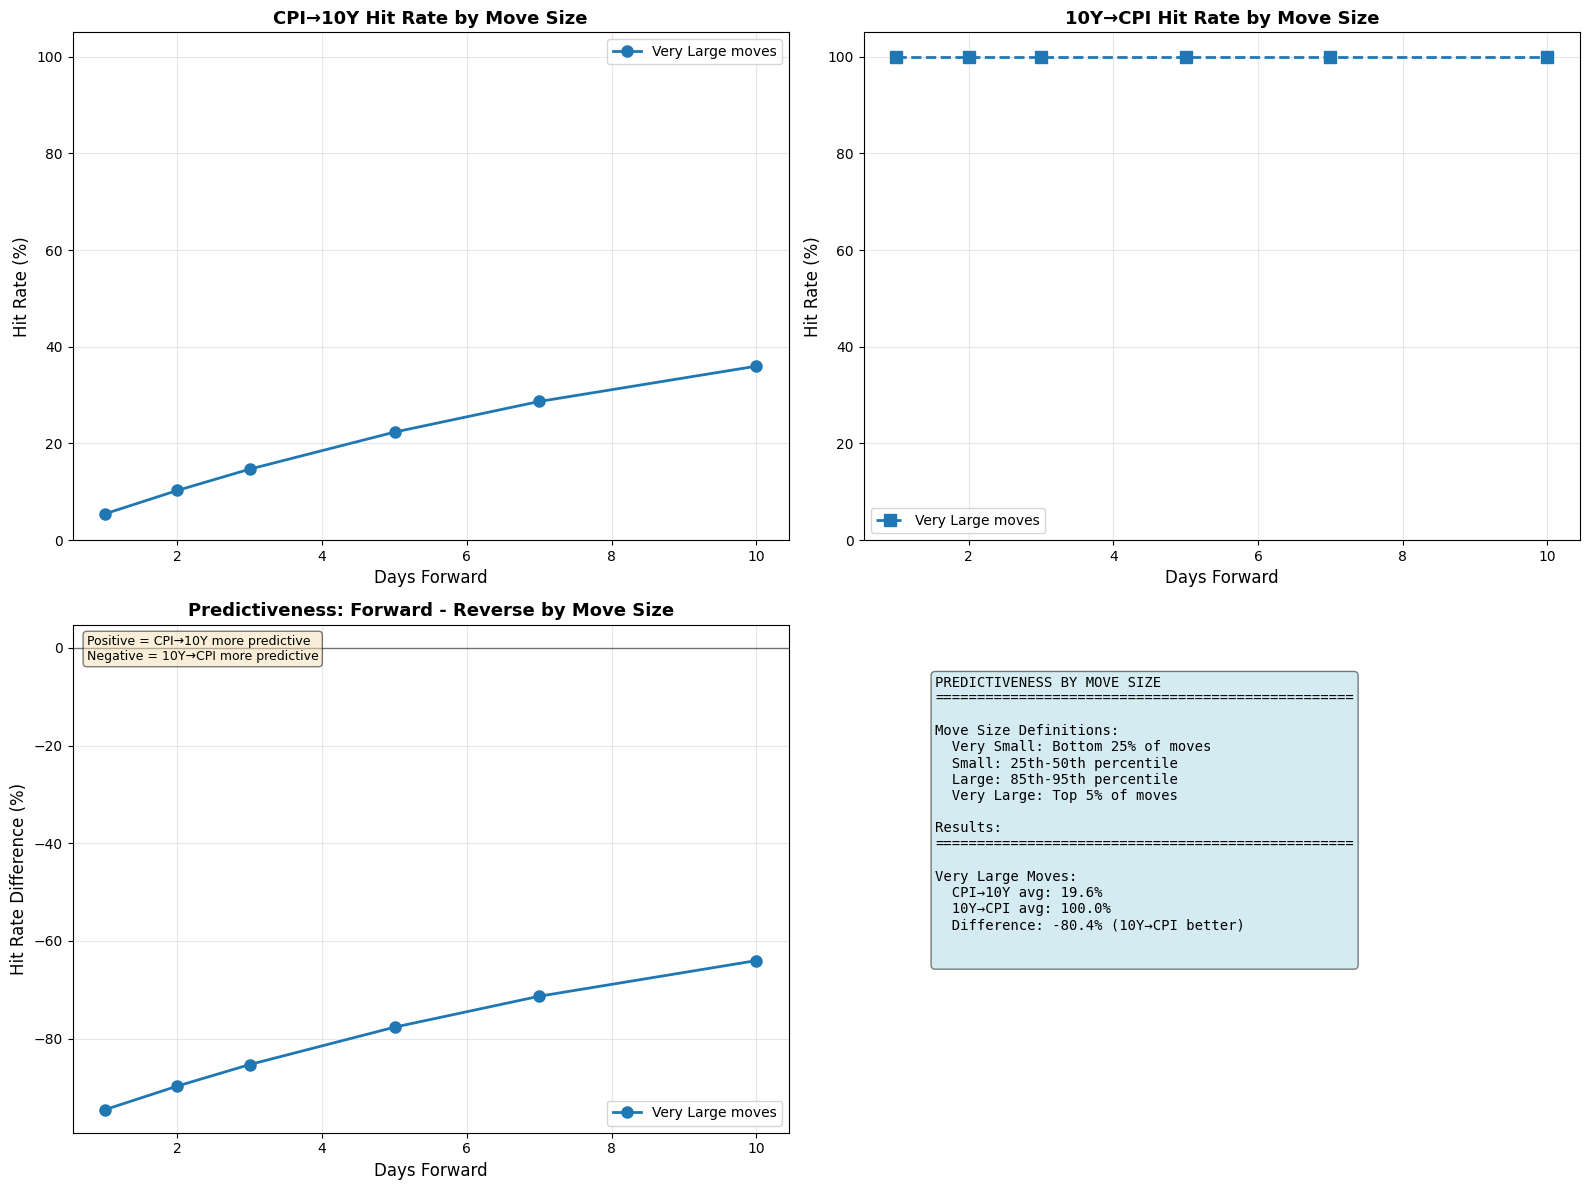


FORWARD (CPI→10Y) BY MOVE SIZE

Move Size Definitions:
  Very Small: Bottom 25% of absolute changes
  Small: 25th-50th percentile of absolute changes
  Large: 85th-95th percentile of absolute changes
  Very Large: Top 5% of absolute changes

Very Large Moves:
              hit_rate
forward_days          
1                 5.47
2                10.30
3                14.70
5                22.35
7                28.69
10               35.98

REVERSE (10Y→CPI) BY MOVE SIZE

Very Large Moves:
              hit_rate
forward_days          
1                100.0
2                100.0
3                100.0
5                100.0
7                100.0
10               100.0

PREDICTIVENESS COMPARISON BY MOVE SIZE (Forward - Reverse)

Very Large Moves:
    Difference (%)
1           -89.70
2           -85.30
3           -77.65
5           -64.02
7              NaN
10             NaN


In [154]:
# Create visualizations by move size
if results_pp:
    df_pp_results = pd.DataFrame(results_pp)
    
    # Separate forward and reverse
    df_pp_forward = df_pp_results[df_pp_results['direction'] == 'CPI→10Y']
    df_pp_reverse = df_pp_results[df_pp_results['direction'] == '10Y→CPI']
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Hit rate by move size - Forward
    ax1 = axes[0, 0]
    for move_name in ['Very Small', 'Small', 'Large', 'Very Large']:
        df_move = df_pp_forward[df_pp_forward['move_size'] == move_name]
        if len(df_move) > 0:
            ax1.plot(df_move['forward_days'], df_move['hit_rate'] * 100, 
                    marker='o', linewidth=2, markersize=8, label=f'{move_name} moves')
    ax1.set_xlabel('Days Forward', fontsize=12)
    ax1.set_ylabel('Hit Rate (%)', fontsize=12)
    ax1.set_title('CPI→10Y Hit Rate by Move Size', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_ylim([0, 105])
    
    # Plot 2: Hit rate by move size - Reverse
    ax2 = axes[0, 1]
    for move_name in ['Very Small', 'Small', 'Large', 'Very Large']:
        df_move = df_pp_reverse[df_pp_reverse['move_size'] == move_name]
        if len(df_move) > 0:
            ax2.plot(df_move['forward_days'], df_move['hit_rate'] * 100, 
                    marker='s', linewidth=2, markersize=8, label=f'{move_name} moves', linestyle='--')
    ax2.set_xlabel('Days Forward', fontsize=12)
    ax2.set_ylabel('Hit Rate (%)', fontsize=12)
    ax2.set_title('10Y→CPI Hit Rate by Move Size', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_ylim([0, 105])
    
    # Plot 3: Predictiveness comparison (Forward - Reverse) by move size
    ax3 = axes[1, 0]
    for move_name in ['Very Small', 'Small', 'Large', 'Very Large']:
        df_fwd = df_pp_forward[df_pp_forward['move_size'] == move_name]
        df_rev = df_pp_reverse[df_pp_reverse['move_size'] == move_name]
        if len(df_fwd) > 0 and len(df_rev) > 0:
            # Align by forward_days
            merged = pd.merge(df_fwd[['forward_days', 'hit_rate']], 
                            df_rev[['forward_days', 'hit_rate']], 
                            on='forward_days', suffixes=('_fwd', '_rev'))
            if len(merged) > 0:
                hit_rate_diff = (merged['hit_rate_fwd'] - merged['hit_rate_rev']) * 100
                ax3.plot(merged['forward_days'], hit_rate_diff, 
                        marker='o', linewidth=2, markersize=8, label=f'{move_name} moves')
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    ax3.set_xlabel('Days Forward', fontsize=12)
    ax3.set_ylabel('Hit Rate Difference (%)', fontsize=12)
    ax3.set_title('Predictiveness: Forward - Reverse by Move Size', fontsize=13, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    ax3.text(0.02, 0.98, 'Positive = CPI→10Y more predictive\nNegative = 10Y→CPI more predictive', 
            transform=ax3.transAxes, fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Plot 4: Summary by move size
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    summary_text = "PREDICTIVENESS BY MOVE SIZE\n" + "="*50 + "\n\n"
    summary_text += "Move Size Definitions:\n"
    summary_text += "  Very Small: Bottom 25% of moves\n"
    summary_text += "  Small: 25th-50th percentile\n"
    summary_text += "  Large: 85th-95th percentile\n"
    summary_text += "  Very Large: Top 5% of moves\n\n"
    summary_text += "Results:\n" + "="*50 + "\n\n"
    for move_name in ['Very Small', 'Small', 'Large', 'Very Large']:
        df_fwd = df_pp_forward[df_pp_forward['move_size'] == move_name]
        df_rev = df_pp_reverse[df_pp_reverse['move_size'] == move_name]
        if len(df_fwd) > 0 and len(df_rev) > 0:
            avg_fwd = df_fwd['hit_rate'].mean() * 100
            avg_rev = df_rev['hit_rate'].mean() * 100
            diff = avg_fwd - avg_rev
            summary_text += f"{move_name} Moves:\n"
            summary_text += f"  CPI→10Y avg: {avg_fwd:.1f}%\n"
            summary_text += f"  10Y→CPI avg: {avg_rev:.1f}%\n"
            summary_text += f"  Difference: {diff:+.1f}% "
            if diff > 2:
                summary_text += "(CPI→10Y better)\n"
            elif diff < -2:
                summary_text += "(10Y→CPI better)\n"
            else:
                summary_text += "(Similar)\n"
            summary_text += "\n"
    
    ax4.text(0.1, 0.9, summary_text, transform=ax4.transAxes, fontsize=10,
            verticalalignment='top', family='monospace',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Summary tables
    print(f"\n{'='*80}")
    print("FORWARD (CPI→10Y) BY MOVE SIZE")
    print(f"{'='*80}")
    print("\nMove Size Definitions:")
    print("  Very Small: Bottom 25% of absolute changes")
    print("  Small: 25th-50th percentile of absolute changes")
    print("  Large: 85th-95th percentile of absolute changes")
    print("  Very Large: Top 5% of absolute changes")
    for move_name in ['Very Small', 'Small', 'Large', 'Very Large']:
        df_move = df_pp_forward[df_pp_forward['move_size'] == move_name]
        if len(df_move) > 0:
            print(f"\n{move_name} Moves:")
            print(df_move.pivot_table(index='forward_days', values='hit_rate', 
                                     aggfunc='first').round(4) * 100)
    
    print(f"\n{'='*80}")
    print("REVERSE (10Y→CPI) BY MOVE SIZE")
    print(f"{'='*80}")
    for move_name in ['Very Small', 'Small', 'Large', 'Very Large']:
        df_move = df_pp_reverse[df_pp_reverse['move_size'] == move_name]
        if len(df_move) > 0:
            print(f"\n{move_name} Moves:")
            print(df_move.pivot_table(index='forward_days', values='hit_rate', 
                                     aggfunc='first').round(4) * 100)
    
    print(f"\n{'='*80}")
    print("PREDICTIVENESS COMPARISON BY MOVE SIZE (Forward - Reverse)")
    print(f"{'='*80}")
    for move_name in ['Very Small', 'Small', 'Large', 'Very Large']:
        df_fwd = df_pp_forward[df_pp_forward['move_size'] == move_name]
        df_rev = df_pp_reverse[df_pp_reverse['move_size'] == move_name]
        if len(df_fwd) > 0 and len(df_rev) > 0:
            merged = pd.merge(df_fwd[['forward_days', 'hit_rate']], 
                            df_rev[['forward_days', 'hit_rate']], 
                            on='forward_days', suffixes=('_fwd', '_rev'))
            if len(merged) > 0:
                diff_table = pd.DataFrame({
                    'Difference (%)': (merged['hit_rate_fwd'] - merged['hit_rate_rev']) * 100
                }, index=merged['forward_days'].values)
                print(f"\n{move_name} Moves:")
                print(diff_table.round(2))


## Predictive Models: CPI Predicted → 10Y Yields

Simple autoregressive models to predict 10Y yield changes within the next few days using CPI predicted and background factors.


In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Prepare modeling dataset
df_model = panel[['date', 'expinf_1y', 'y_10y', 'fed_funds', 'unemployment', 
                  'slope_10y_2y', 'hy_oas', 'vix', 'stlfsi']].copy()
df_model = df_model.sort_values('date').reset_index(drop=True)

# Calculate changes
df_model['cpi_change'] = df_model['expinf_1y'].diff()
df_model['y10_change'] = df_model['y_10y'].diff()

# Create lagged features (autoregressive)
for lag in [1, 2, 3, 5]:
    df_model[f'y10_lag_{lag}'] = df_model['y_10y'].shift(lag)
    df_model[f'y10_change_lag_{lag}'] = df_model['y10_change'].shift(lag)

# Create forward targets (predicting future changes)
forward_days_model = [1, 2, 3, 5, 7]
for forward in forward_days_model:
    df_model[f'y10_change_fwd_{forward}'] = df_model['y_10y'].shift(-forward) - df_model['y_10y']

# Remove rows with NaN
df_model = df_model.dropna()

print("MODELING DATASET PREPARATION")
print("="*60)
print(f"Total observations: {len(df_model)}")
print(f"Date range: {df_model['date'].min().date()} to {df_model['date'].max().date()}")
print(f"\nFeatures available:")
print(f"  CPI: expinf_1y, cpi_change")
print(f"  Lagged 10Y: y10_lag_1, y10_lag_2, y10_lag_3, y10_lag_5")
print(f"  Lagged 10Y changes: y10_change_lag_1, y10_change_lag_2, y10_change_lag_3, y10_change_lag_5")
print(f"  Background: fed_funds, unemployment, slope_10y_2y, hy_oas, vix, stlfsi")
print(f"\nTargets: y10_change_fwd_1, y10_change_fwd_2, y10_change_fwd_3, y10_change_fwd_5, y10_change_fwd_7")


MODELING DATASET PREPARATION
Total observations: 10598
Date range: 1996-12-31 to 2026-01-05

Features available:
  CPI: expinf_1y, cpi_change
  Lagged 10Y: y10_lag_1, y10_lag_2, y10_lag_3, y10_lag_5
  Lagged 10Y changes: y10_change_lag_1, y10_change_lag_2, y10_change_lag_3, y10_change_lag_5
  Background: fed_funds, unemployment, slope_10y_2y, hy_oas, vix, stlfsi

Targets: y10_change_fwd_1, y10_change_fwd_2, y10_change_fwd_3, y10_change_fwd_5, y10_change_fwd_7


In [156]:
def calculate_adjusted_r2(r2, n, p):
    """Calculate adjusted R²"""
    if n - p - 1 <= 0:
        return np.nan
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def train_and_evaluate_model(X, y, model_name, test_size=0.3):
    """Train a model and return metrics"""
    # Split data chronologically (not random)
    split_idx = int(len(X) * (1 - test_size))
    X_train = X.iloc[:split_idx]
    X_test = X.iloc[split_idx:]
    y_train = y.iloc[:split_idx]
    y_test = y.iloc[split_idx:]
    
    # Remove any remaining NaN
    train_mask = X_train.notna().all(axis=1) & y_train.notna()
    test_mask = X_test.notna().all(axis=1) & y_test.notna()
    
    X_train = X_train[train_mask]
    y_train = y_train[train_mask]
    X_test = X_test[test_mask]
    y_test = y_test[test_mask]
    
    if len(X_train) < 10 or len(X_test) < 10:
        return None
    
    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    n_train = len(X_train)
    n_test = len(X_test)
    p = X_train.shape[1]  # number of features
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    adj_r2_train = calculate_adjusted_r2(r2_train, n_train, p)
    adj_r2_test = calculate_adjusted_r2(r2_test, n_test, p)
    
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    return {
        'model_name': model_name,
        'n_features': p,
        'n_train': n_train,
        'n_test': n_test,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'adj_r2_train': adj_r2_train,
        'adj_r2_test': adj_r2_test,
        'rmse_test': rmse_test,
        'mae_test': mae_test,
        'model': model,
        'feature_names': list(X_train.columns),
        'coefficients': dict(zip(X_train.columns, model.coef_)),
    }

print("Model evaluation function ready.")


Model evaluation function ready.


## Model 1: Simple Model (CPI Only, No Background Factors)

Clean model with only CPI predicted features.


In [157]:
# Model 1: Simple - CPI predicted only
results_model1 = []

for forward in forward_days_model:
    target = f'y10_change_fwd_{forward}'
    
    # Features: CPI predicted level and change only
    X = df_model[['expinf_1y', 'cpi_change']].copy()
    y = df_model[target].copy()
    
    result = train_and_evaluate_model(X, y, f'Model 1: CPI Only (fwd+{forward})', test_size=0.3)
    if result:
        results_model1.append(result)

# Display results
if results_model1:
    print("="*80)
    print("MODEL 1: SIMPLE (CPI PREDICTED ONLY)")
    print("="*80)
    print(f"\n{'Forward Days':<15} {'R² Train':<12} {'R² Test':<12} {'Adj R² Train':<15} {'Adj R² Test':<15} {'RMSE Test':<12} {'MAE Test':<12}")
    print("-"*80)
    for r in results_model1:
        forward = r['model_name'].split('fwd+')[1].split(')')[0]
        print(f"{forward:<15} {r['r2_train']:>11.4f} {r['r2_test']:>11.4f} {r['adj_r2_train']:>14.4f} {r['adj_r2_test']:>14.4f} {r['rmse_test']:>11.4f} {r['mae_test']:>11.4f}")
    
    # Show coefficients for one model
    print(f"\n{'='*80}")
    print("COEFFICIENTS (Example: Forward +1 day)")
    print(f"{'='*80}")
    example = results_model1[0]
    print(f"Features: {example['feature_names']}")
    for feat, coef in example['coefficients'].items():
        print(f"  {feat}: {coef:.6f}")


MODEL 1: SIMPLE (CPI PREDICTED ONLY)

Forward Days    R² Train     R² Test      Adj R² Train    Adj R² Test     RMSE Test    MAE Test    
--------------------------------------------------------------------------------
1                    0.0011     -0.0040         0.0009        -0.0046      0.0454      0.0284
2                    0.0008     -0.0026         0.0005        -0.0033      0.0638      0.0433
3                    0.0009     -0.0055         0.0007        -0.0061      0.0769      0.0560
5                    0.0014     -0.0095         0.0011        -0.0101      0.0990      0.0740
7                    0.0017     -0.0139         0.0014        -0.0146      0.1164      0.0874

COEFFICIENTS (Example: Forward +1 day)
Features: ['expinf_1y', 'cpi_change']
  expinf_1y: -0.000790
  cpi_change: 0.023780


## Model 2: Autoregressive Model (CPI + Lagged 10Y)

Model with CPI predicted and autoregressive features (lagged 10Y yields).


In [158]:
# Model 2: Autoregressive - CPI + Lagged 10Y
results_model2 = []

for forward in forward_days_model:
    target = f'y10_change_fwd_{forward}'
    
    # Features: CPI predicted + lagged 10Y level and changes
    X = df_model[['expinf_1y', 'cpi_change', 
                  'y10_lag_1', 'y10_change_lag_1', 'y10_change_lag_2']].copy()
    y = df_model[target].copy()
    
    result = train_and_evaluate_model(X, y, f'Model 2: AR + CPI (fwd+{forward})', test_size=0.3)
    if result:
        results_model2.append(result)

# Display results
if results_model2:
    print("="*80)
    print("MODEL 2: AUTOREGRESSIVE (CPI + LAGGED 10Y)")
    print("="*80)
    print(f"\n{'Forward Days':<15} {'R² Train':<12} {'R² Test':<12} {'Adj R² Train':<15} {'Adj R² Test':<15} {'RMSE Test':<12} {'MAE Test':<12}")
    print("-"*80)
    for r in results_model2:
        forward = r['model_name'].split('fwd+')[1].split(')')[0]
        print(f"{forward:<15} {r['r2_train']:>11.4f} {r['r2_test']:>11.4f} {r['adj_r2_train']:>14.4f} {r['adj_r2_test']:>14.4f} {r['rmse_test']:>11.4f} {r['mae_test']:>11.4f}")
    
    # Show coefficients
    print(f"\n{'='*80}")
    print("COEFFICIENTS (Example: Forward +1 day)")
    print(f"{'='*80}")
    example = results_model2[0]
    print(f"Features: {example['feature_names']}")
    for feat, coef in example['coefficients'].items():
        print(f"  {feat}: {coef:.6f}")


MODEL 2: AUTOREGRESSIVE (CPI + LAGGED 10Y)

Forward Days    R² Train     R² Test      Adj R² Train    Adj R² Test     RMSE Test    MAE Test    
--------------------------------------------------------------------------------
1                    0.0018     -0.0003         0.0011        -0.0019      0.0453      0.0286
2                    0.0032      0.0006         0.0025        -0.0010      0.0637      0.0435
3                    0.0048      0.0007         0.0041        -0.0009      0.0767      0.0559
5                    0.0043      0.0034         0.0036         0.0018      0.0983      0.0738
7                    0.0049      0.0051         0.0042         0.0035      0.1153      0.0869

COEFFICIENTS (Example: Forward +1 day)
Features: ['expinf_1y', 'cpi_change', 'y10_lag_1', 'y10_change_lag_1', 'y10_change_lag_2']
  expinf_1y: 0.001275
  cpi_change: 0.022856
  y10_lag_1: -0.001228
  y10_change_lag_1: -0.012692
  y10_change_lag_2: -0.008126


## Model 3: Full Model (CPI + AR + Background Factors)

Model with CPI predicted, autoregressive features, and background macroeconomic factors.


In [159]:
# Model 3: Full - CPI + AR + Background factors
results_model3 = []

for forward in forward_days_model:
    target = f'y10_change_fwd_{forward}'
    
    # Features: CPI + AR + background factors
    X = df_model[['expinf_1y', 'cpi_change',
                  'y10_lag_1', 'y10_change_lag_1', 'y10_change_lag_2',
                  'fed_funds', 'unemployment', 'slope_10y_2y', 
                  'hy_oas', 'vix']].copy()
    y = df_model[target].copy()
    
    result = train_and_evaluate_model(X, y, f'Model 3: Full (fwd+{forward})', test_size=0.3)
    if result:
        results_model3.append(result)

# Display results
if results_model3:
    print("="*80)
    print("MODEL 3: FULL (CPI + AR + BACKGROUND FACTORS)")
    print("="*80)
    print(f"\n{'Forward Days':<15} {'R² Train':<12} {'R² Test':<12} {'Adj R² Train':<15} {'Adj R² Test':<15} {'RMSE Test':<12} {'MAE Test':<12}")
    print("-"*80)
    for r in results_model3:
        forward = r['model_name'].split('fwd+')[1].split(')')[0]
        print(f"{forward:<15} {r['r2_train']:>11.4f} {r['r2_test']:>11.4f} {r['adj_r2_train']:>14.4f} {r['adj_r2_test']:>14.4f} {r['rmse_test']:>11.4f} {r['mae_test']:>11.4f}")
    
    # Show coefficients
    print(f"\n{'='*80}")
    print("COEFFICIENTS (Example: Forward +1 day)")
    print(f"{'='*80}")
    example = results_model3[0]
    print(f"Features: {example['feature_names']}")
    for feat, coef in example['coefficients'].items():
        print(f"  {feat}: {coef:.6f}")


MODEL 3: FULL (CPI + AR + BACKGROUND FACTORS)

Forward Days    R² Train     R² Test      Adj R² Train    Adj R² Test     RMSE Test    MAE Test    
--------------------------------------------------------------------------------
1                    0.0023     -0.0025         0.0009        -0.0057      0.0453      0.0290
2                    0.0042     -0.0037         0.0028        -0.0068      0.0638      0.0439
3                    0.0062     -0.0057         0.0049        -0.0089      0.0769      0.0562
5                    0.0069     -0.0070         0.0056        -0.0102      0.0988      0.0744
7                    0.0088     -0.0097         0.0075        -0.0129      0.1162      0.0878

COEFFICIENTS (Example: Forward +1 day)
Features: ['expinf_1y', 'cpi_change', 'y10_lag_1', 'y10_change_lag_1', 'y10_change_lag_2', 'fed_funds', 'unemployment', 'slope_10y_2y', 'hy_oas', 'vix']
  expinf_1y: 0.000164
  cpi_change: 0.023436
  y10_lag_1: -0.001557
  y10_change_lag_1: -0.012334
  y10_chang

## Model Comparison Summary

Compare all models across different forward prediction horizons.


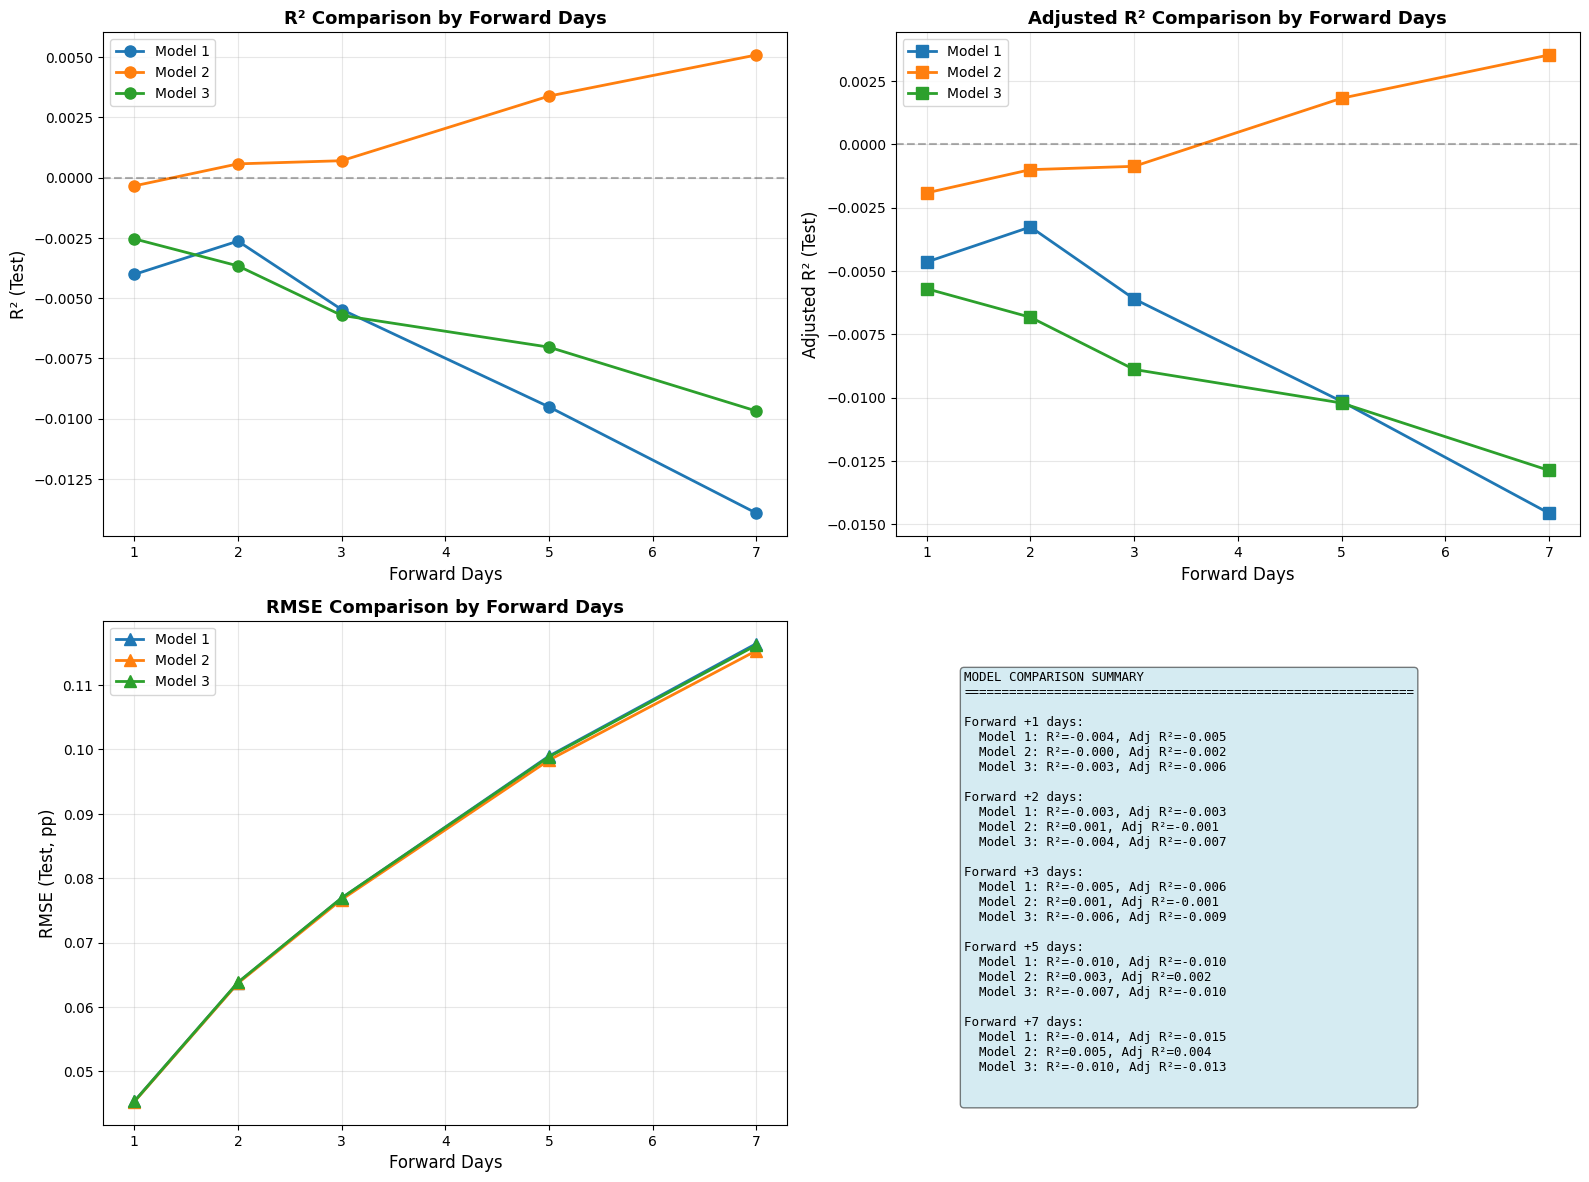

DETAILED MODEL COMPARISON
             adj_r2_test                 r2_test                 rmse_test  \
model_type       Model 1 Model 2 Model 3 Model 1 Model 2 Model 3   Model 1   
forward_days                                                                 
1                -0.0046 -0.0019 -0.0057 -0.0040 -0.0003 -0.0025    0.0454   
2                -0.0033 -0.0010 -0.0068 -0.0026  0.0006 -0.0037    0.0638   
3                -0.0061 -0.0009 -0.0089 -0.0055  0.0007 -0.0057    0.0769   
5                -0.0101  0.0018 -0.0102 -0.0095  0.0034 -0.0070    0.0990   
7                -0.0146  0.0035 -0.0129 -0.0139  0.0051 -0.0097    0.1164   

                              
model_type   Model 2 Model 3  
forward_days                  
1             0.0453  0.0453  
2             0.0637  0.0638  
3             0.0767  0.0769  
5             0.0983  0.0988  
7             0.1153  0.1162  

KEY INSIGHTS

Forward +1 days:
  Best R²: Model 2 (R²=-0.0003)
  Best Adj R²: Model 2 (Adj R²=-0.001

In [160]:
# Combine all results for comparison
all_results = []
for r in results_model1:
    all_results.append(r)
for r in results_model2:
    all_results.append(r)
for r in results_model3:
    all_results.append(r)

if all_results:
    df_comparison = pd.DataFrame(all_results)
    
    # Create comparison plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Extract forward days from model names
    df_comparison['forward_days'] = df_comparison['model_name'].str.extract(r'fwd\+(\d+)').astype(int)
    df_comparison['model_type'] = df_comparison['model_name'].str.extract(r'(Model \d+)')
    
    # Plot 1: R² Test by forward days
    ax1 = axes[0, 0]
    for model_type in ['Model 1', 'Model 2', 'Model 3']:
        df_subset = df_comparison[df_comparison['model_type'] == model_type].sort_values('forward_days')
        if len(df_subset) > 0:
            ax1.plot(df_subset['forward_days'], df_subset['r2_test'], 
                    marker='o', linewidth=2, markersize=8, label=model_type)
    ax1.set_xlabel('Forward Days', fontsize=12)
    ax1.set_ylabel('R² (Test)', fontsize=12)
    ax1.set_title('R² Comparison by Forward Days', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.3)
    
    # Plot 2: Adjusted R² Test by forward days
    ax2 = axes[0, 1]
    for model_type in ['Model 1', 'Model 2', 'Model 3']:
        df_subset = df_comparison[df_comparison['model_type'] == model_type].sort_values('forward_days')
        if len(df_subset) > 0:
            ax2.plot(df_subset['forward_days'], df_subset['adj_r2_test'], 
                    marker='s', linewidth=2, markersize=8, label=model_type)
    ax2.set_xlabel('Forward Days', fontsize=12)
    ax2.set_ylabel('Adjusted R² (Test)', fontsize=12)
    ax2.set_title('Adjusted R² Comparison by Forward Days', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.3)
    
    # Plot 3: RMSE by forward days
    ax3 = axes[1, 0]
    for model_type in ['Model 1', 'Model 2', 'Model 3']:
        df_subset = df_comparison[df_comparison['model_type'] == model_type].sort_values('forward_days')
        if len(df_subset) > 0:
            ax3.plot(df_subset['forward_days'], df_subset['rmse_test'], 
                    marker='^', linewidth=2, markersize=8, label=model_type)
    ax3.set_xlabel('Forward Days', fontsize=12)
    ax3.set_ylabel('RMSE (Test, pp)', fontsize=12)
    ax3.set_title('RMSE Comparison by Forward Days', fontsize=13, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # Plot 4: Summary table
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    # Create summary text
    summary_text = "MODEL COMPARISON SUMMARY\n" + "="*60 + "\n\n"
    for forward in forward_days_model:
        summary_text += f"Forward +{forward} days:\n"
        for model_type in ['Model 1', 'Model 2', 'Model 3']:
            df_subset = df_comparison[(df_comparison['model_type'] == model_type) & 
                                      (df_comparison['forward_days'] == forward)]
            if len(df_subset) > 0:
                r = df_subset.iloc[0]
                summary_text += f"  {model_type}: R²={r['r2_test']:.3f}, Adj R²={r['adj_r2_test']:.3f}\n"
        summary_text += "\n"
    
    ax4.text(0.1, 0.9, summary_text, transform=ax4.transAxes, fontsize=9,
            verticalalignment='top', family='monospace',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Detailed comparison table
    print("="*80)
    print("DETAILED MODEL COMPARISON")
    print("="*80)
    comparison_table = df_comparison.pivot_table(
        index='forward_days',
        columns='model_type',
        values=['r2_test', 'adj_r2_test', 'rmse_test'],
        aggfunc='first'
    )
    print(comparison_table.round(4))
    
    # Key insights
    print(f"\n{'='*80}")
    print("KEY INSIGHTS")
    print(f"{'='*80}")
    for forward in forward_days_model:
        df_fwd = df_comparison[df_comparison['forward_days'] == forward]
        if len(df_fwd) > 0:
            best_r2 = df_fwd.loc[df_fwd['r2_test'].idxmax()]
            best_adj_r2 = df_fwd.loc[df_fwd['adj_r2_test'].idxmax()]
            print(f"\nForward +{forward} days:")
            print(f"  Best R²: {best_r2['model_type']} (R²={best_r2['r2_test']:.4f})")
            print(f"  Best Adj R²: {best_adj_r2['model_type']} (Adj R²={best_adj_r2['adj_r2_test']:.4f})")
            if best_r2['model_type'] != best_adj_r2['model_type']:
                print(f"  → Adjusted R² penalizes {best_r2['model_type']} for extra features")


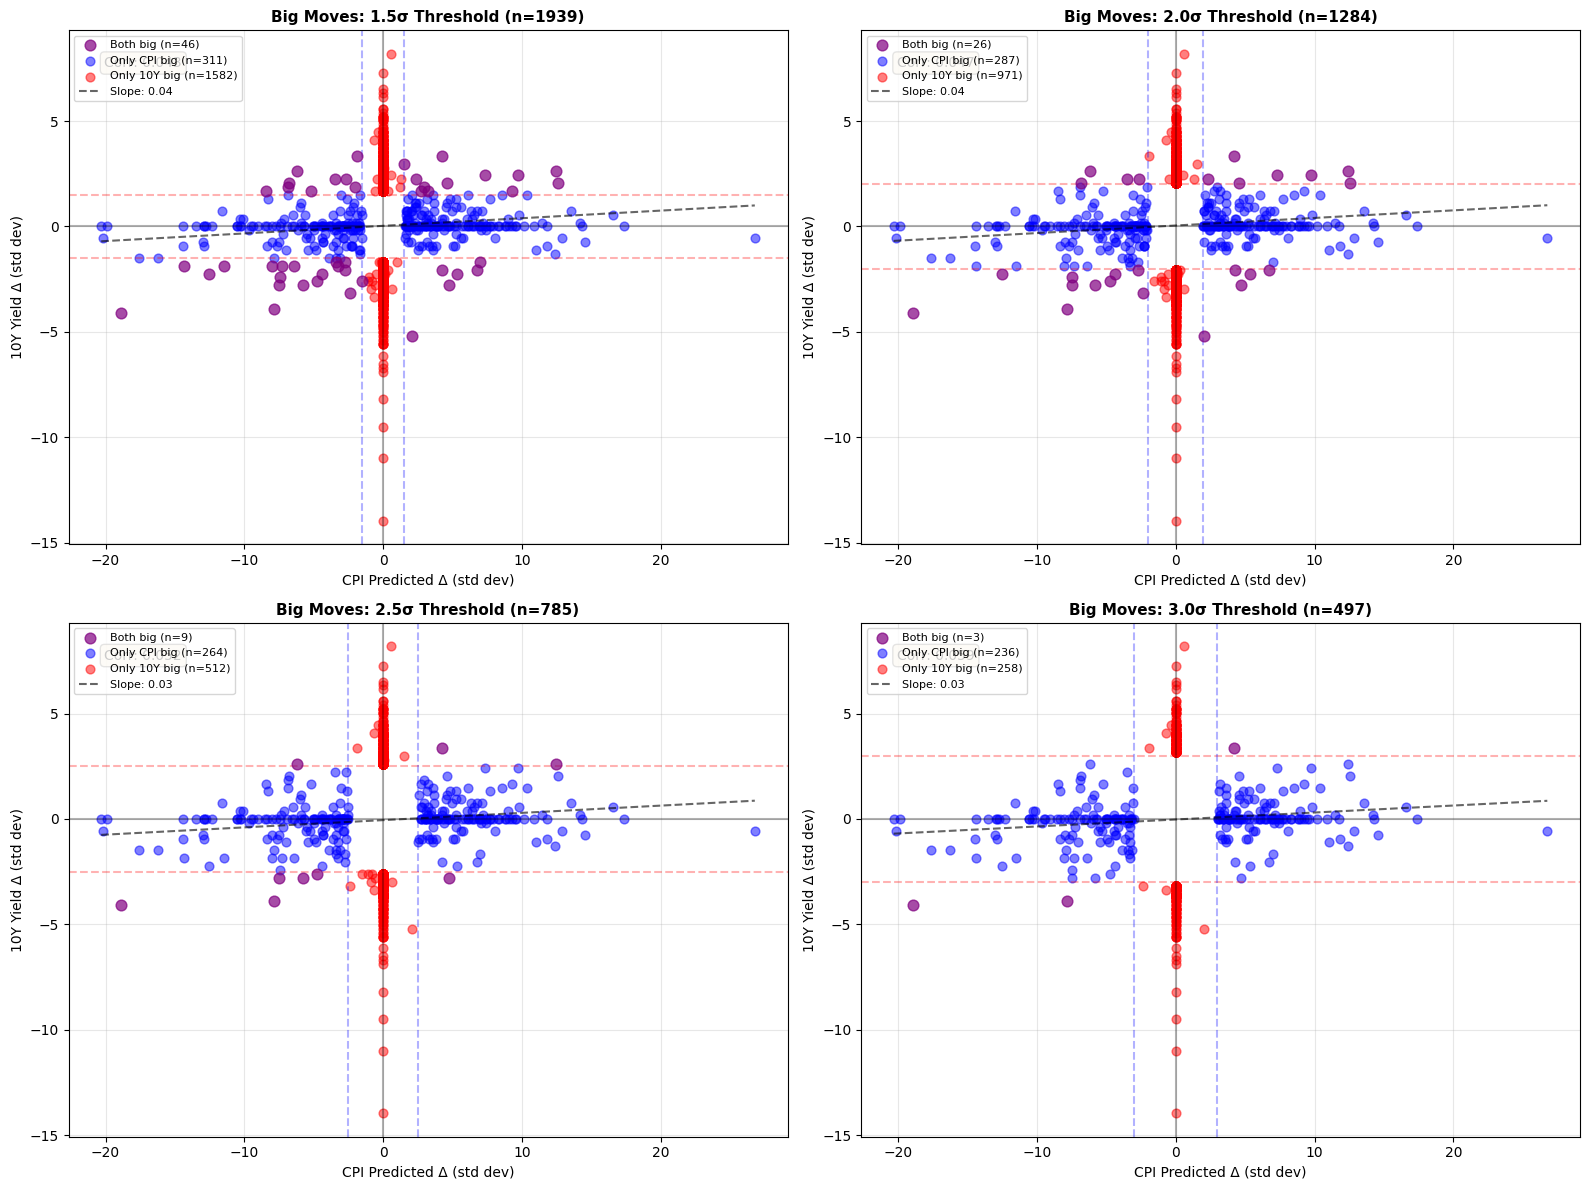


Scatter plots showing big moves at different thresholds
Purple = both series have big moves, Blue = only CPI, Red = only 10Y


In [161]:
# Create scatter plots for big moves at different thresholds
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

thresholds_plot = [1.5, 2.0, 2.5, 3.0]

for idx, threshold in enumerate(thresholds_plot):
    ax = axes[idx // 2, idx % 2]
    
    # Filter to big moves
    cpi_big = df_bigmoves['cpi_delta_normalized'].abs() >= threshold
    y10_big = df_bigmoves['y10_delta_normalized'].abs() >= threshold
    big_moves_mask = cpi_big | y10_big
    
    df_big = df_bigmoves[big_moves_mask].copy()
    
    if len(df_big) < 5:
        ax.text(0.5, 0.5, f'Insufficient data\n(threshold: {threshold}σ)', 
               ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title(f'Big Moves: {threshold}σ Threshold', fontsize=11, fontweight='bold')
        continue
    
    # Color code: both big, only CPI big, only 10Y big
    both_big = (df_big['cpi_delta_normalized'].abs() >= threshold) & (df_big['y10_delta_normalized'].abs() >= threshold)
    only_cpi = (df_big['cpi_delta_normalized'].abs() >= threshold) & (df_big['y10_delta_normalized'].abs() < threshold)
    only_y10 = (df_big['cpi_delta_normalized'].abs() < threshold) & (df_big['y10_delta_normalized'].abs() >= threshold)
    
    # Plot
    if both_big.any():
        ax.scatter(df_big[both_big]['cpi_delta_normalized'], 
                  df_big[both_big]['y10_delta_normalized'], 
                  alpha=0.7, s=60, color='purple', label=f'Both big (n={both_big.sum()})', zorder=3)
    if only_cpi.any():
        ax.scatter(df_big[only_cpi]['cpi_delta_normalized'], 
                  df_big[only_cpi]['y10_delta_normalized'], 
                  alpha=0.5, s=40, color='blue', label=f'Only CPI big (n={only_cpi.sum()})', zorder=2)
    if only_y10.any():
        ax.scatter(df_big[only_y10]['cpi_delta_normalized'], 
                  df_big[only_y10]['y10_delta_normalized'], 
                  alpha=0.5, s=40, color='red', label=f'Only 10Y big (n={only_y10.sum()})', zorder=2)
    
    # Add reference lines
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax.axhline(y=threshold, color='red', linestyle='--', alpha=0.3)
    ax.axhline(y=-threshold, color='red', linestyle='--', alpha=0.3)
    ax.axvline(x=threshold, color='blue', linestyle='--', alpha=0.3)
    ax.axvline(x=-threshold, color='blue', linestyle='--', alpha=0.3)
    
    # Add regression line
    if len(df_big) >= 10:
        z = np.polyfit(df_big['cpi_delta_normalized'], df_big['y10_delta_normalized'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(df_big['cpi_delta_normalized'].min(), df_big['cpi_delta_normalized'].max(), 100)
        ax.plot(x_line, p(x_line), "k--", alpha=0.6, linewidth=1.5, label=f'Slope: {z[0]:.2f}')
        
        # Calculate correlation
        corr = df_big['cpi_delta_normalized'].corr(df_big['y10_delta_normalized'])
        ax.text(0.05, 0.95, f'Corr: {corr:.3f}', transform=ax.transAxes, 
               fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax.set_xlabel('CPI Predicted Δ (std dev)', fontsize=10)
    ax.set_ylabel('10Y Yield Δ (std dev)', fontsize=10)
    ax.set_title(f'Big Moves: {threshold}σ Threshold (n={len(df_big)})', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8, loc='upper left')

plt.tight_layout()
plt.show()

print("\nScatter plots showing big moves at different thresholds")
print("Purple = both series have big moves, Blue = only CPI, Red = only 10Y")


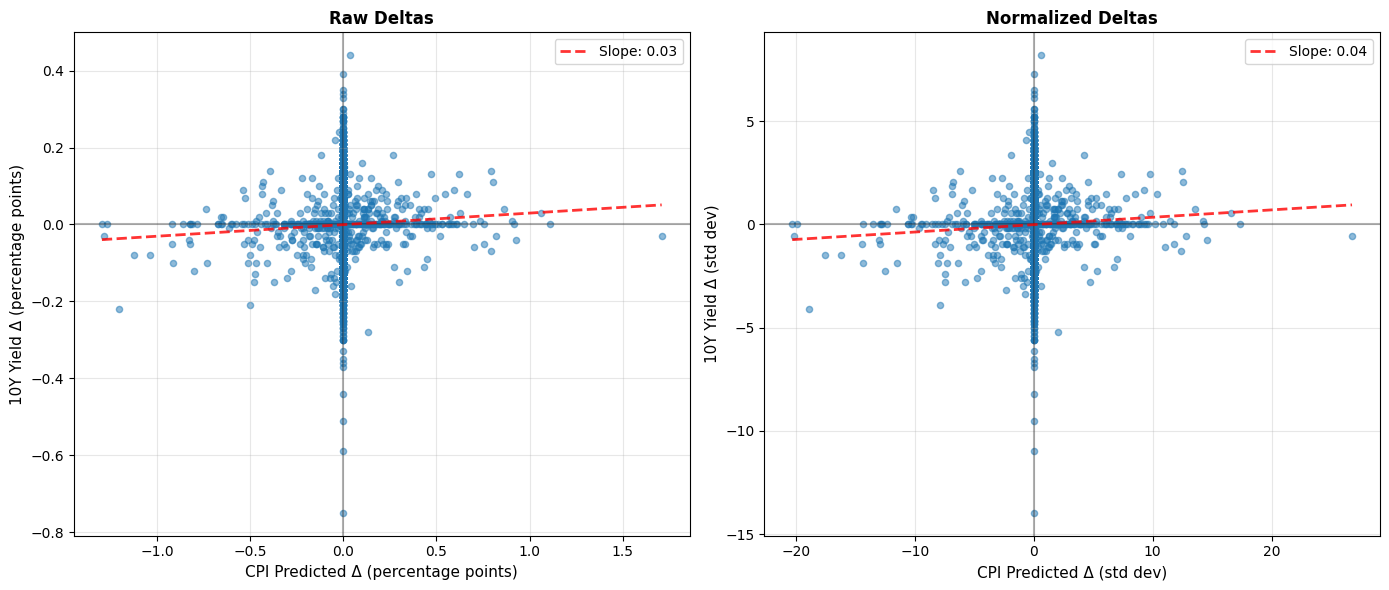


Delta Correlation:
  Raw deltas: 0.0357
  Normalized deltas: 0.0357


In [162]:
# Scatter plot of deltas
df_scatter = df_delta[['cpi_delta', 'y10_delta', 'cpi_delta_normalized', 'y10_delta_normalized']].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Raw deltas
ax1 = axes[0]
ax1.scatter(df_scatter['cpi_delta'], df_scatter['y10_delta'], alpha=0.5, s=20)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax1.set_xlabel('CPI Predicted Δ (percentage points)', fontsize=11)
ax1.set_ylabel('10Y Yield Δ (percentage points)', fontsize=11)
ax1.set_title('Raw Deltas', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add regression line
if len(df_scatter) > 10:
    z = np.polyfit(df_scatter['cpi_delta'], df_scatter['y10_delta'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df_scatter['cpi_delta'].min(), df_scatter['cpi_delta'].max(), 100)
    ax1.plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2, label=f'Slope: {z[0]:.2f}')
    ax1.legend()

# Plot 2: Normalized deltas
ax2 = axes[1]
ax2.scatter(df_scatter['cpi_delta_normalized'], df_scatter['y10_delta_normalized'], alpha=0.5, s=20)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax2.set_xlabel('CPI Predicted Δ (std dev)', fontsize=11)
ax2.set_ylabel('10Y Yield Δ (std dev)', fontsize=11)
ax2.set_title('Normalized Deltas', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add regression line
if len(df_scatter) > 10:
    z_norm = np.polyfit(df_scatter['cpi_delta_normalized'], df_scatter['y10_delta_normalized'], 1)
    p_norm = np.poly1d(z_norm)
    x_line_norm = np.linspace(df_scatter['cpi_delta_normalized'].min(), df_scatter['cpi_delta_normalized'].max(), 100)
    ax2.plot(x_line_norm, p_norm(x_line_norm), "r--", alpha=0.8, linewidth=2, label=f'Slope: {z_norm[0]:.2f}')
    ax2.legend()

plt.tight_layout()
plt.show()

# Calculate correlation of deltas
delta_corr = df_scatter['cpi_delta'].corr(df_scatter['y10_delta'])
delta_corr_norm = df_scatter['cpi_delta_normalized'].corr(df_scatter['y10_delta_normalized'])

print(f"\nDelta Correlation:")
print(f"  Raw deltas: {delta_corr:.4f}")
print(f"  Normalized deltas: {delta_corr_norm:.4f}")
